In [ ]:

#view image in breastmnist file in dataset folder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import os
from helper_functions import *

dfile = '../Datasets/breastmnist.npz'
if not os.path.exists(dfile):
	raise FileNotFoundError(f"The file {dfile} does not exist.")
data_breastmnist = np.load(dfile)





Train images: (546, 28, 28)
Train labels: (546, 1)


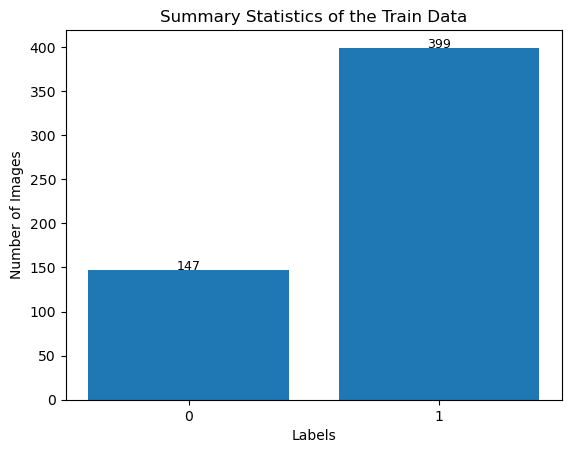

In [8]:
#Exploring the breastmnist dataset
breastmnist_train_images = data_breastmnist['train_images']
breastmnist_train_labels = data_breastmnist['train_labels']

breastmnist_val_images = data_breastmnist['val_images']
breastmnist_val_labels = data_breastmnist['val_labels']

breastmnist_test_images = data_breastmnist['test_images']
breastmnist_test_labels = data_breastmnist['test_labels']

#Inspect the data
print(f"Train images: {breastmnist_train_images.shape}")
print(f"Train labels: {breastmnist_train_labels.shape}")

#Summary statistics of the labels
unique, counts = np.unique(breastmnist_train_labels, return_counts=True)
summary_statistics_train_data = dict(zip(unique, counts))
ax,fig = plt.subplots()
plt.bar(summary_statistics_train_data.keys(), summary_statistics_train_data.values())
plt.title("Summary Statistics of the Train Data")
plt.xlabel("Labels")
plt.xticks(list(summary_statistics_train_data.keys()))
for i in range(len(summary_statistics_train_data)):
    plt.text(i, list(summary_statistics_train_data.values())[i], list(summary_statistics_train_data.values())[i], ha = 'center', size = 9)
plt.ylabel("Number of Images")
plt.show()



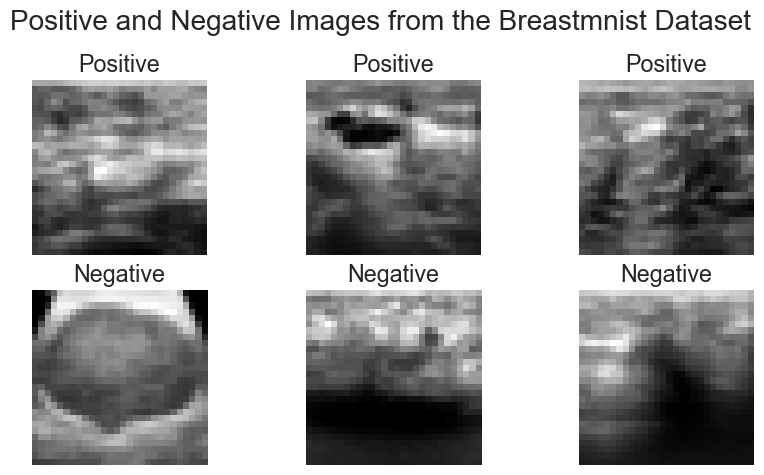

In [29]:
# Display 3 positive and 3 negative images
positive_images = breastmnist_train_images[breastmnist_train_labels == 1].drop(columns='label').values
negative_images = breastmnist_train_images[breastmnist_train_labels == 0].drop(columns='label').values

fig, ax = plt.subplots(2, 3, figsize=(10, 5))
for i in range(3):
    fig.suptitle("Positive and Negative Images from the Breastmnist Dataset", y=1.02)
    ax[0, i].imshow(positive_images[i].reshape(28, 28), cmap='gray')
    ax[0, i].set_title("Positive")
    ax[0, i].axis('off')
    ax[1, i].imshow(negative_images[i].reshape(28, 28), cmap='gray')
    ax[1, i].set_title("Negative")
    ax[1, i].axis('off')
plt.show()

In [9]:
#Normalize the images
breastmnist_train_images = breastmnist_train_images.astype('float32') / 255
breastmnist_val_images = breastmnist_val_images.astype('float32') / 255
breastmnist_test_images = breastmnist_test_images.astype('float32') / 255

#Flatten the images for the model
breastmnist_train_images = breastmnist_train_images.reshape((-1, 28*28))
breastmnist_val_images = breastmnist_val_images.reshape((-1, 28*28))
breastmnist_test_images = breastmnist_test_images.reshape((-1, 28*28))

#Convert to a pandas dataframe
breastmnist_train_images = pd.DataFrame(breastmnist_train_images)
breastmnist_val_images = pd.DataFrame(breastmnist_val_images)
breastmnist_test_images = pd.DataFrame(breastmnist_test_images)

#Add the labels to the dataframes
breastmnist_train_images['label'] = breastmnist_train_labels
breastmnist_val_images['label'] = breastmnist_val_labels
breastmnist_test_images['label'] = breastmnist_test_labels



In [4]:
# Train a Gradient Boosting Classifier and a Random Forest Classifier on the breastmnist dataset
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
gbc_predictions = gbc.predict(breastmnist_val_images.drop(columns='label'))


#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
rfc_predictions = rfc.predict(breastmnist_val_images.drop(columns='label'))



In [ ]:


model_evaluation(breastmnist_val_images['label'], gbc_predictions, 'Gradient Boosting Classifier', 'Validation')
model_evaluation(breastmnist_val_images['label'], rfc_predictions, 'Random Forest Classifier', 'Validation')


In [101]:
# Tune the GBC model using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 125, 150],
    'max_depth': [3, 4]
}
grid_search = GridSearchCV(gbc, param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
print(f'Best parameters for the Gradient Boosting Classifier: {grid_search.best_params_}')


Best parameters for the Gradient Boosting Classifier: {'max_depth': 3, 'n_estimators': 150}


In [102]:
# Tune the RFC model using GridSearchCV
param_grid = {
    'n_estimators': [100, 125, 150]
}
grid_search = GridSearchCV(rfc, param_grid, cv=3)
grid_search.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
print(f'Best parameters for the Random Forest Classifier: {grid_search.best_params_}')


Best parameters for the Random Forest Classifier: {'n_estimators': 125}


In [6]:

# Adjust the models with the best parameters
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=3)
gbc.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])

rfc = RandomForestClassifier(n_estimators=125)
rfc.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])

# Evaluate the models on the test sets
gbc_test_predictions = gbc.predict(breastmnist_test_images.drop(columns='label'))
rfc_test_predictions = rfc.predict(breastmnist_test_images.drop(columns='label'))

# Evaluate the probability of the models on the test sets
gbc_test_probabilities = gbc.predict_proba(breastmnist_test_images.drop(columns='label'))
rfc_test_probabilities = rfc.predict_proba(breastmnist_test_images.drop(columns='label'))


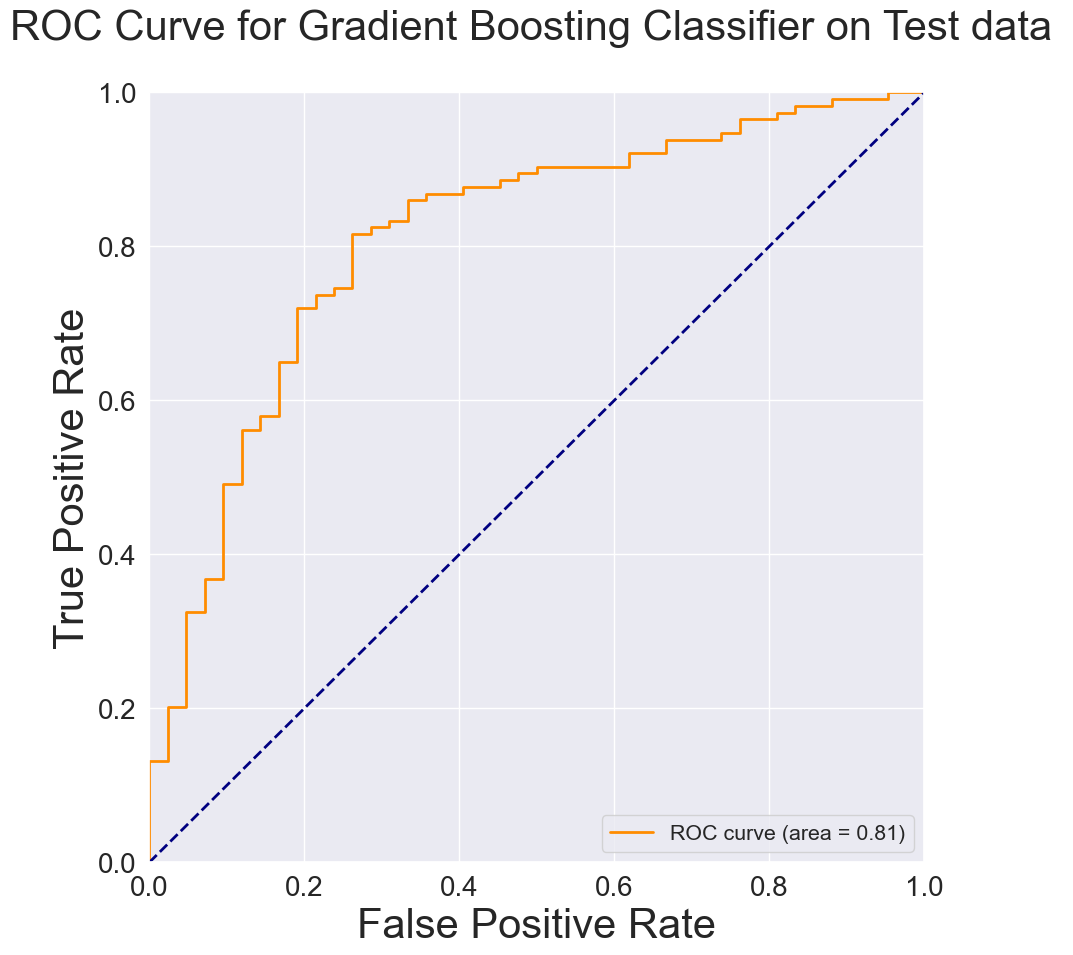

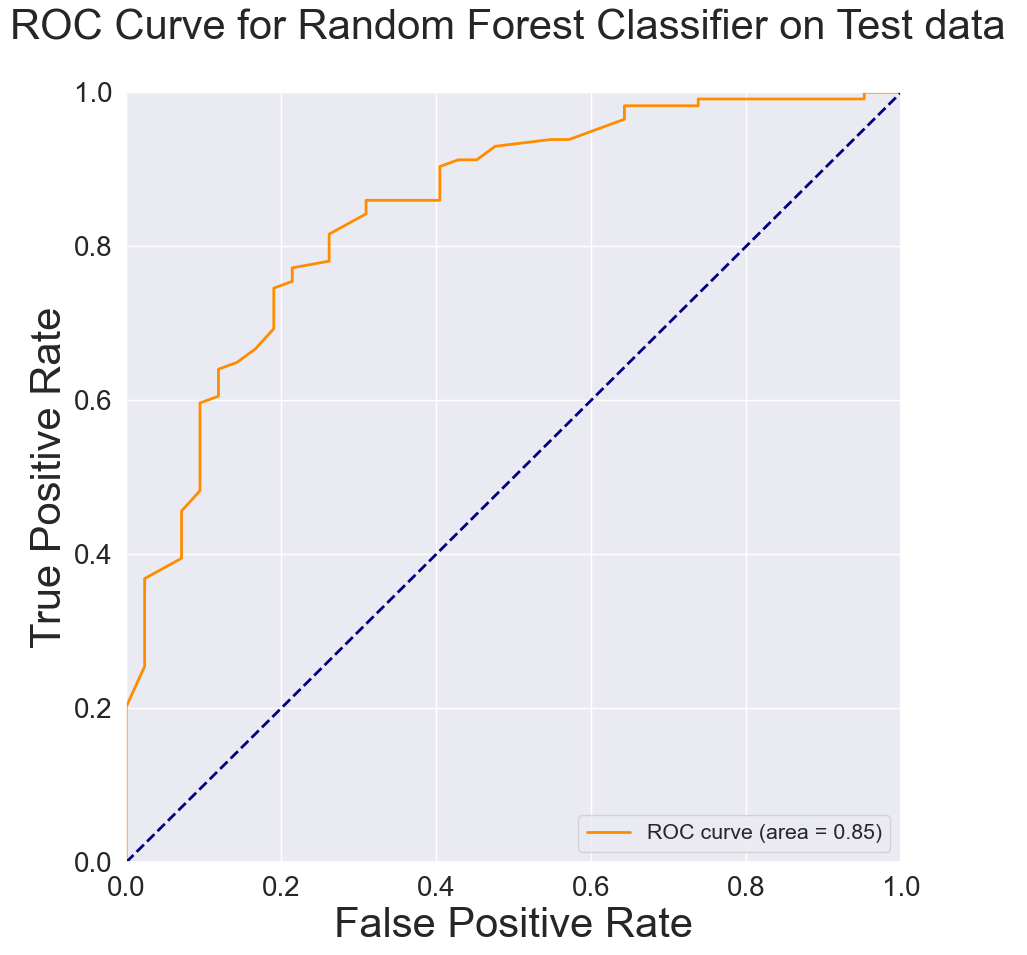

In [16]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Evaluate the RoC-AUC graphs of the models on the test sets
plot_roc_curve(breastmnist_test_images['label'], gbc_test_probabilities[:, 1], 'Gradient Boosting Classifier', 'Test')
plot_roc_curve(breastmnist_test_images['label'], rfc_test_probabilities[:, 1], 'Random Forest Classifier', 'Test')

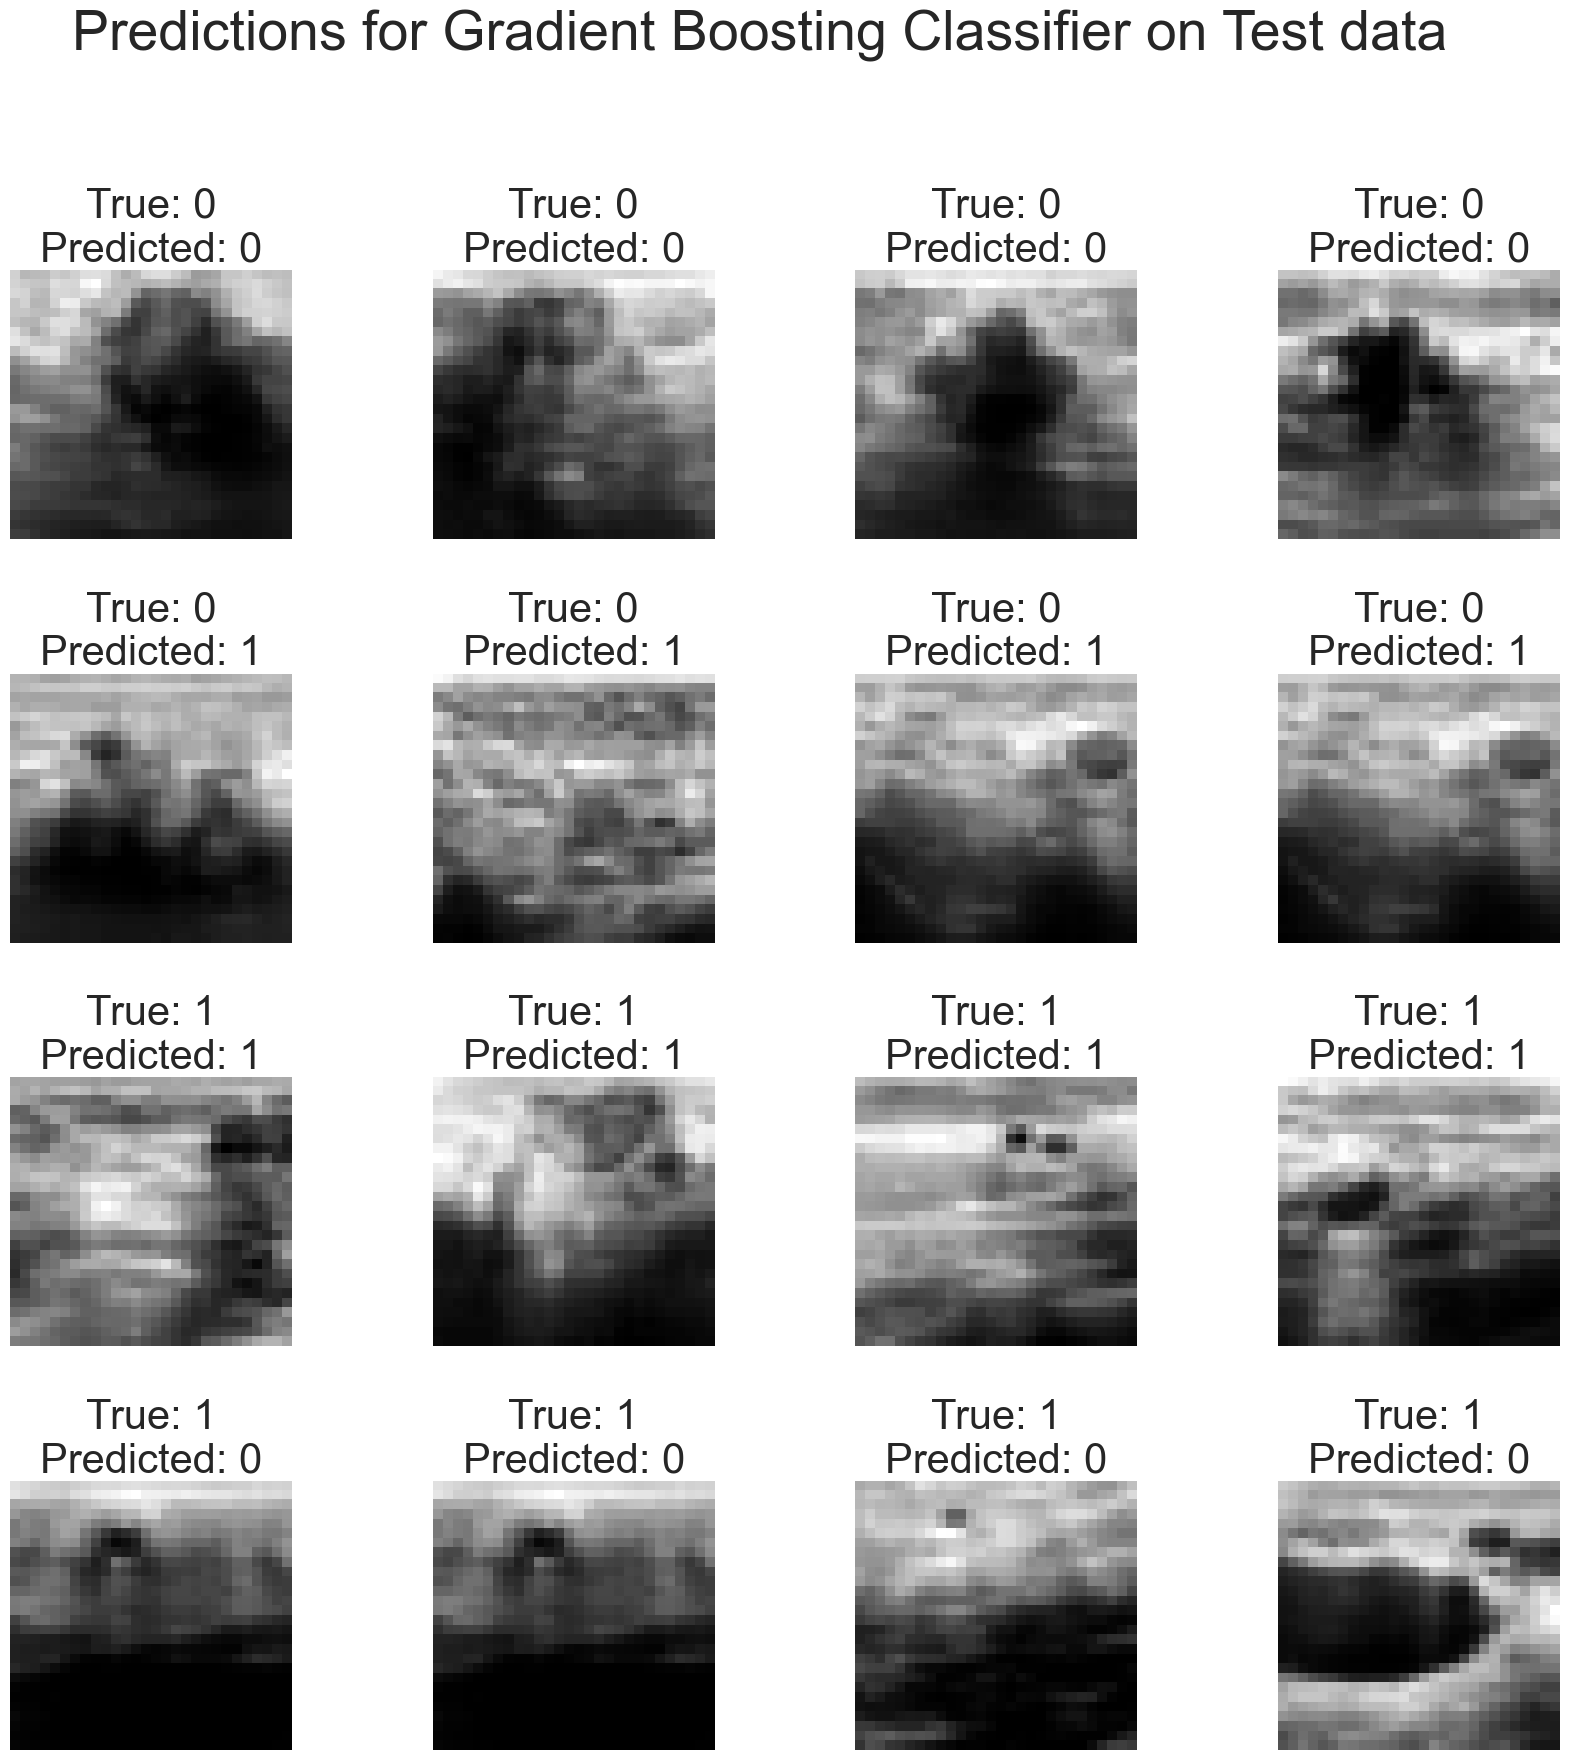

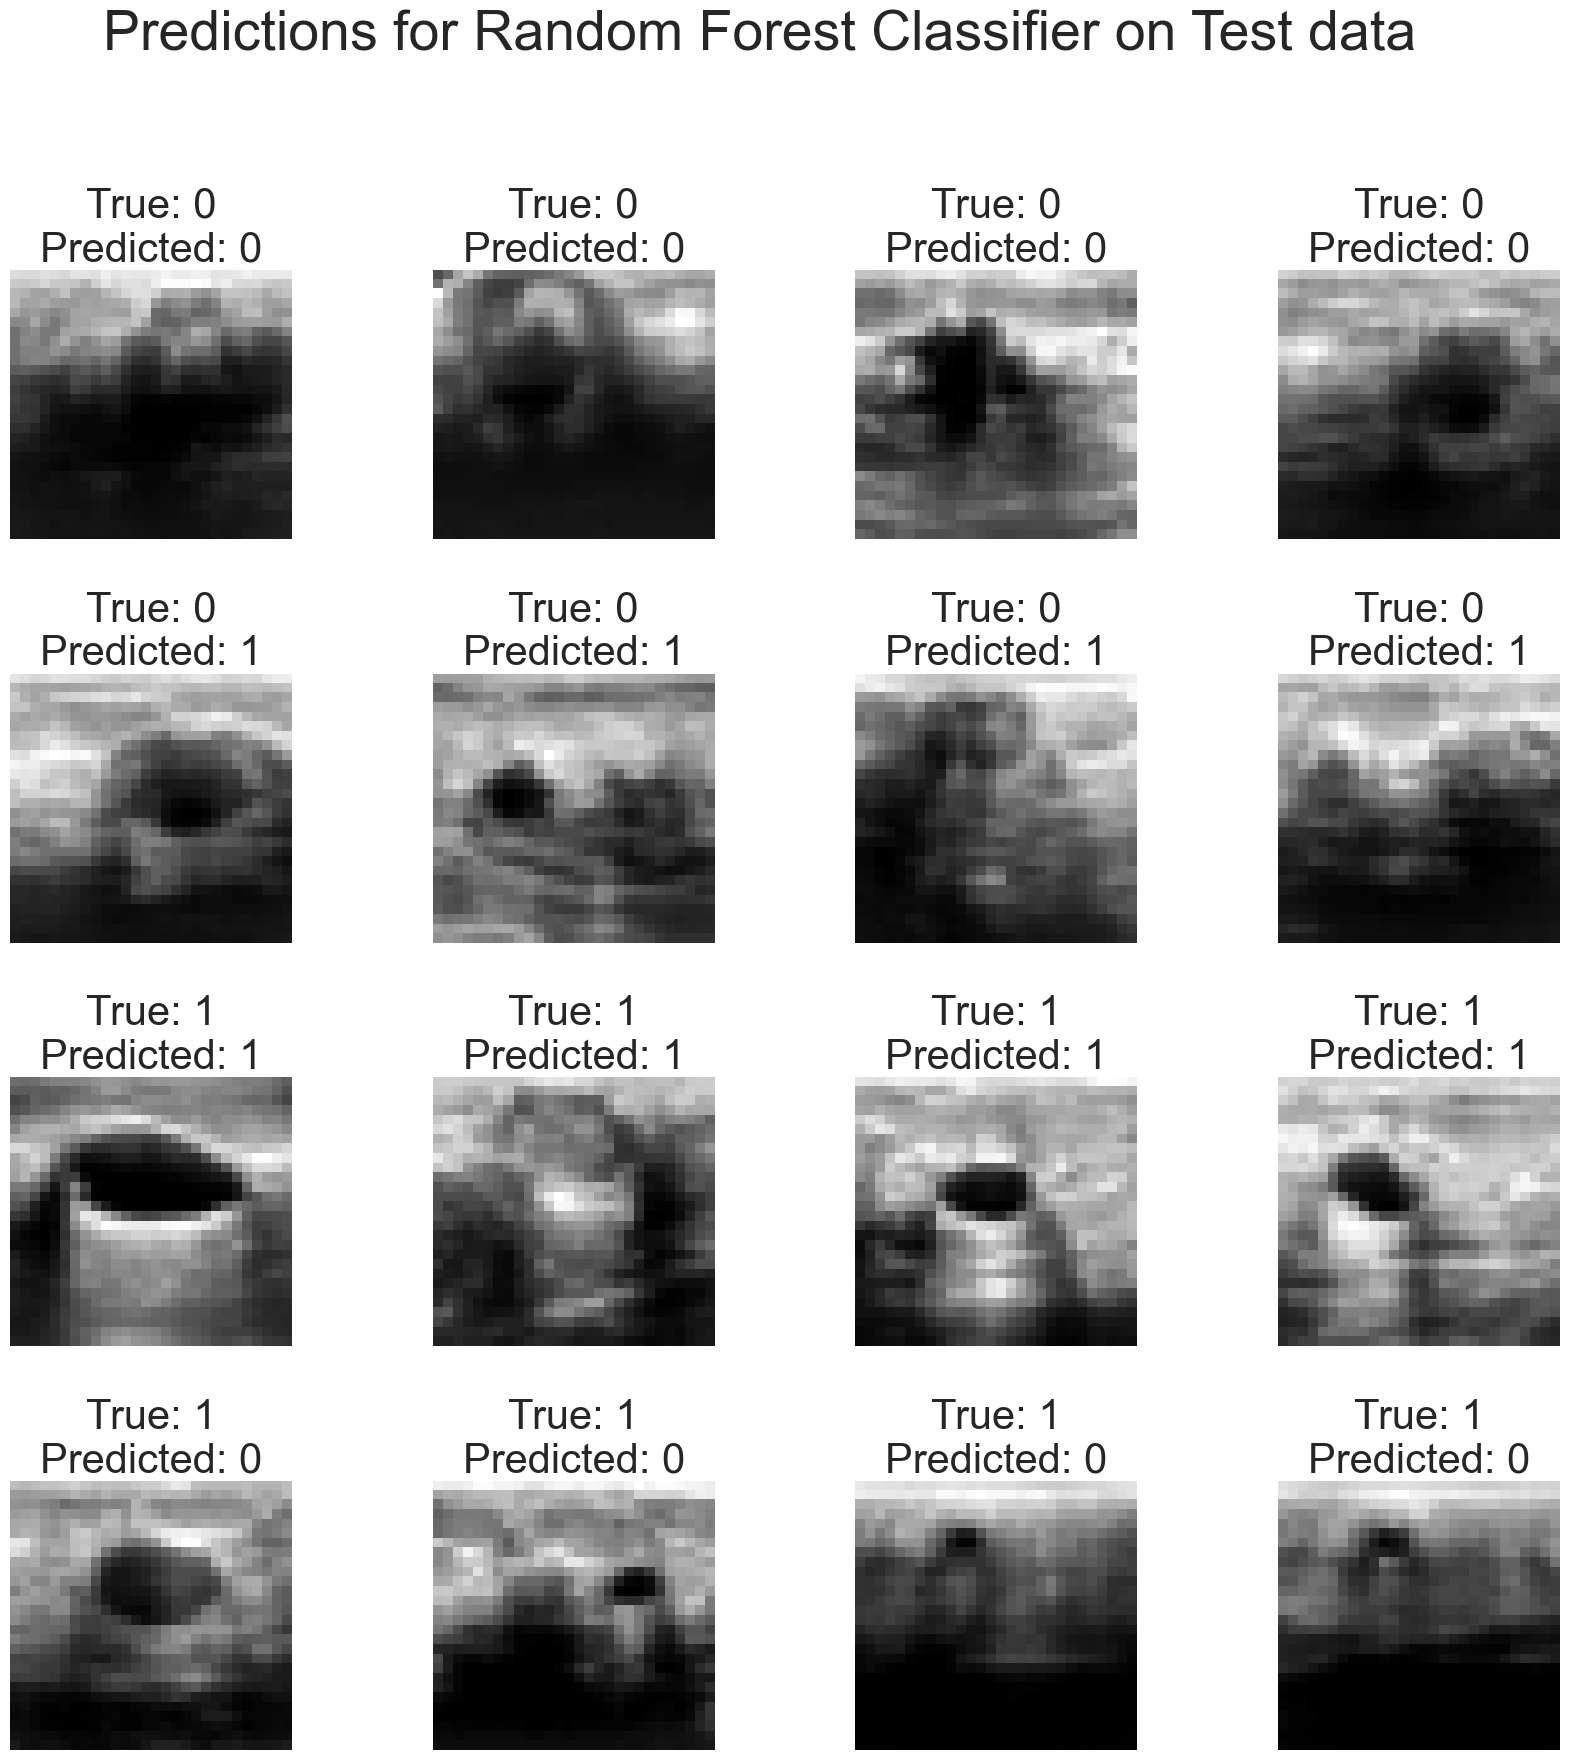

In [51]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *


# Display 3 images that the model's predicted incorrectly
display_incorrect_images(breastmnist_test_images.drop(columns='label'), breastmnist_test_images['label'],gbc_test_predictions,  'Gradient Boosting Classifier', 'Test')
display_incorrect_images(breastmnist_test_images.drop(columns='label'), breastmnist_test_images['label'],rfc_test_predictions, 'Random Forest Classifier', 'Test')


Classification report for Gradient Boosting Classifier on Test data:
              precision    recall  f1-score   support

           0       0.62      0.48      0.54        42
           1       0.82      0.89      0.86       114

    accuracy                           0.78       156
   macro avg       0.72      0.69      0.70       156
weighted avg       0.77      0.78      0.77       156

Classification report for Random Forest Classifier on Test data:
              precision    recall  f1-score   support

           0       0.71      0.40      0.52        42
           1       0.81      0.94      0.87       114

    accuracy                           0.79       156
   macro avg       0.76      0.67      0.69       156
weighted avg       0.78      0.79      0.77       156



'              precision    recall  f1-score   support\n\n           0       0.71      0.40      0.52        42\n           1       0.81      0.94      0.87       114\n\n    accuracy                           0.79       156\n   macro avg       0.76      0.67      0.69       156\nweighted avg       0.78      0.79      0.77       156\n'

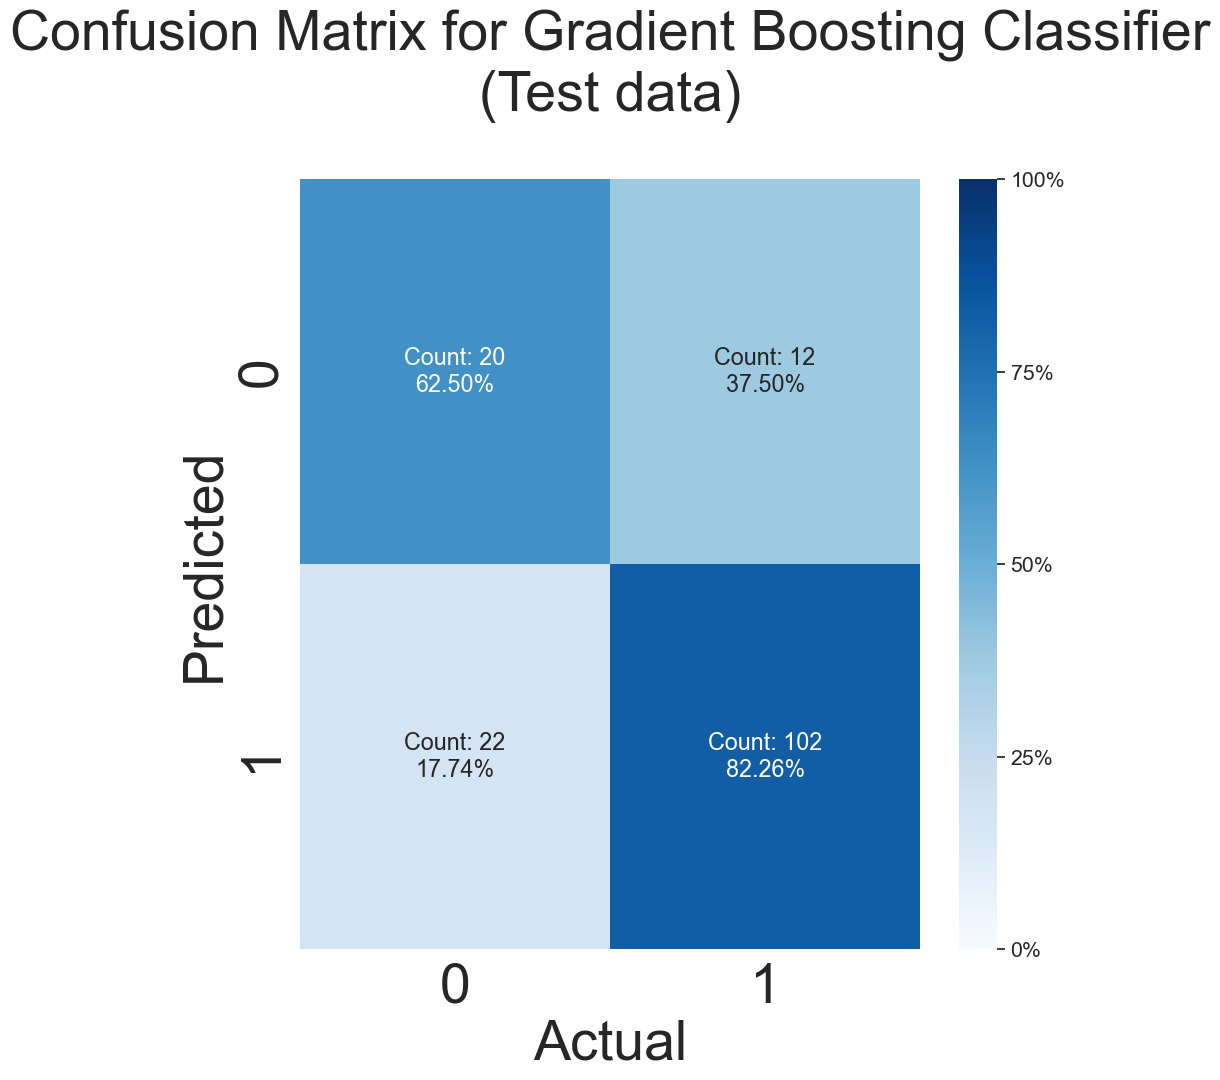

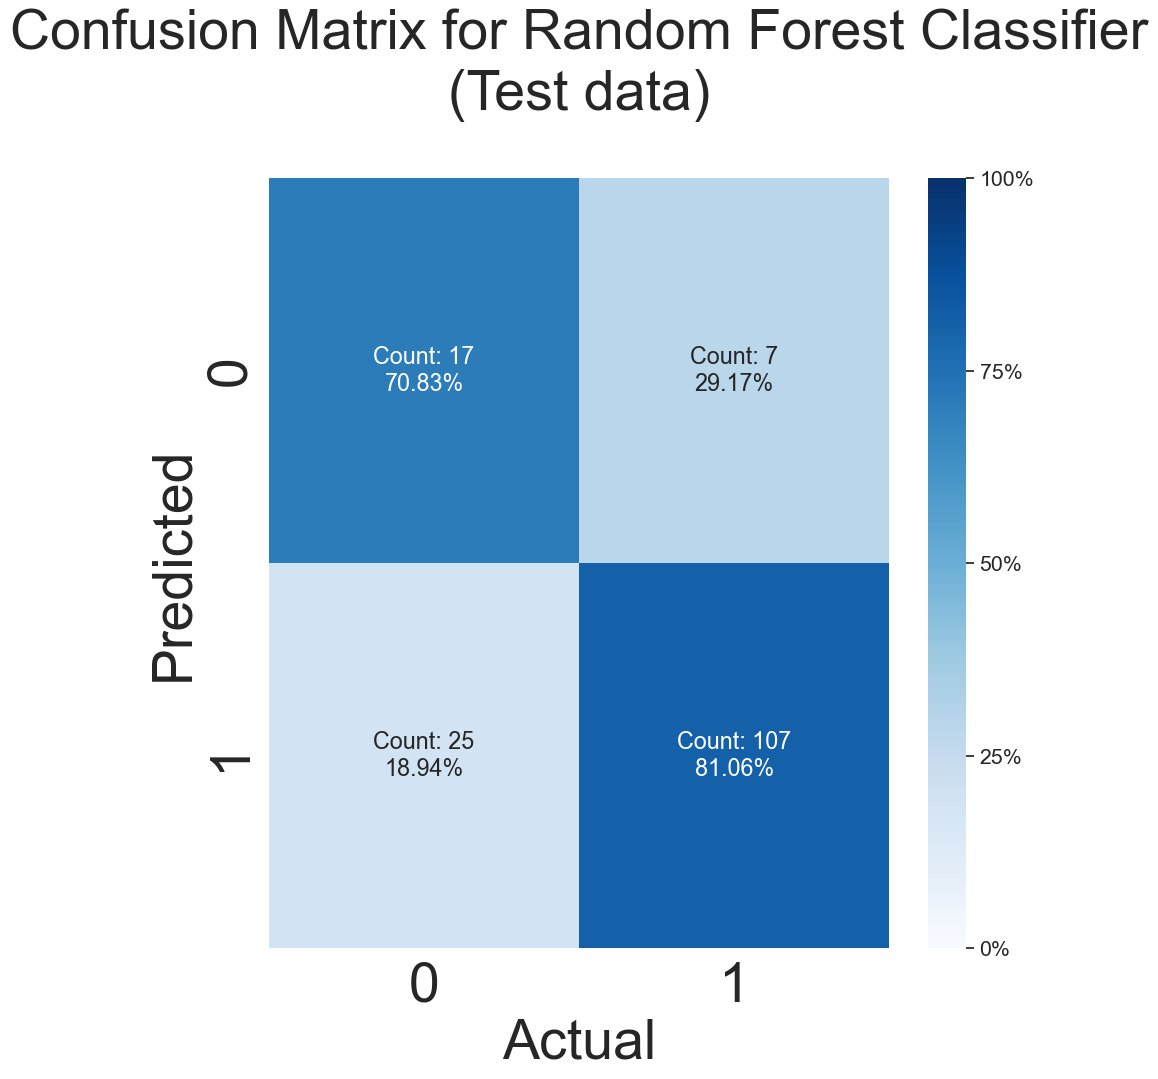

In [94]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Accuracy of the Gradient Boost Classifier model on the test set
model_evaluation(breastmnist_test_images['label'], gbc_test_predictions, 'Gradient Boosting Classifier', 'Test')
# Accuracy of the Random Forest Classifier model on the test set
model_evaluation(breastmnist_test_images['label'], rfc_test_predictions, 'Random Forest Classifier', 'Test')

'              precision    recall  f1-score   support\n\n           0       0.53      0.76      0.63        21\n           1       0.90      0.75      0.82        57\n\n    accuracy                           0.76        78\n   macro avg       0.71      0.76      0.72        78\nweighted avg       0.80      0.76      0.77        78\n'

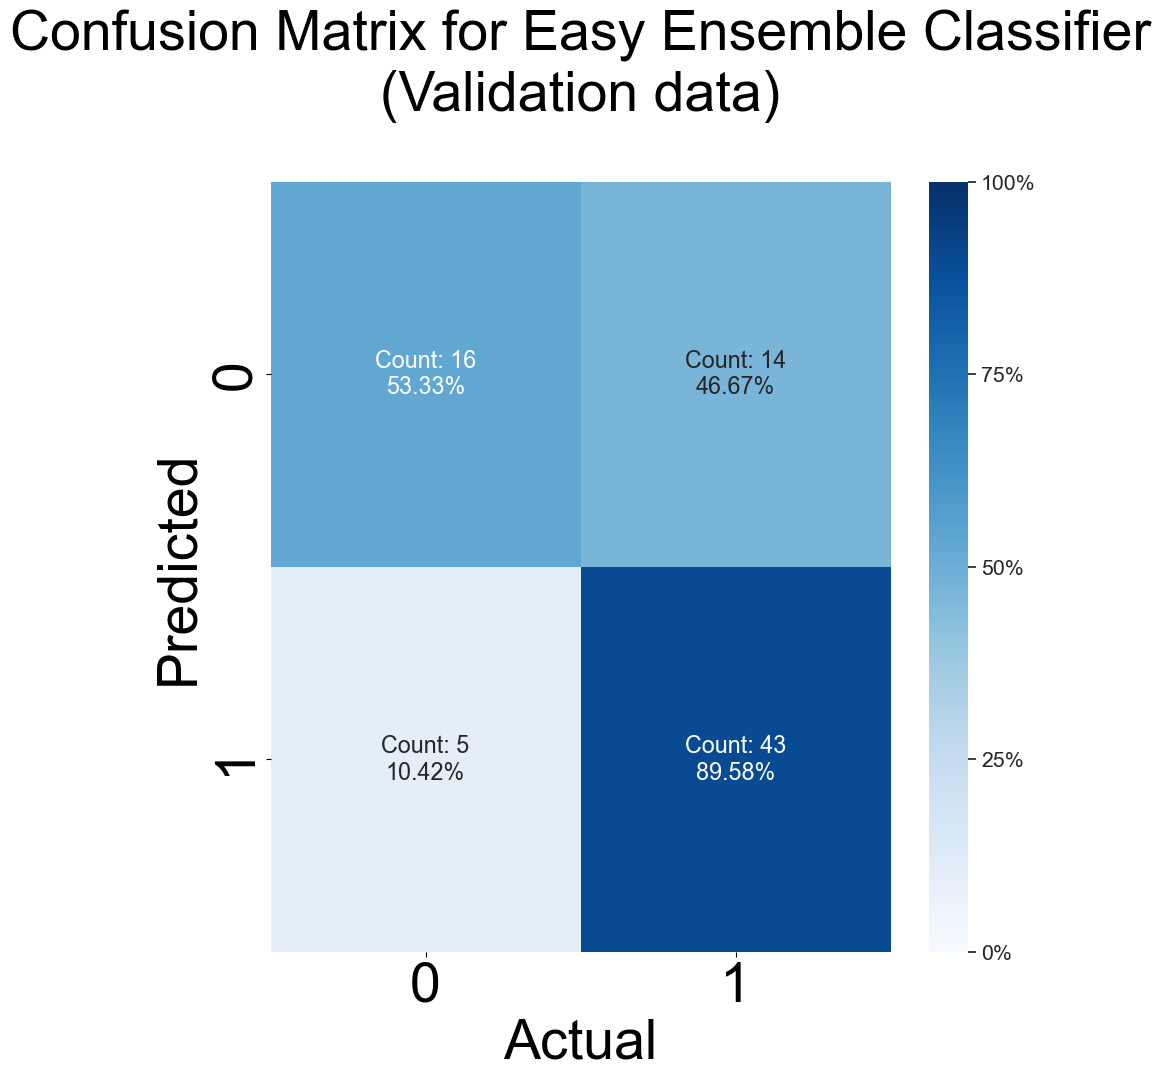

In [10]:
# Train a Gradient Bootsting Classifier with additional bagging of balanced learners

from imblearn.ensemble import EasyEnsembleClassifier
GBC_estimator = GradientBoostingClassifier(n_estimators=100, max_depth=3)
eec = EasyEnsembleClassifier(estimator=GBC_estimator, sampling_strategy=1, random_state=0)
eec.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
eec_val_predictions = eec.predict(breastmnist_val_images.drop(columns='label'))

model_evaluation(breastmnist_val_images['label'], eec_val_predictions, 'Easy Ensemble Classifier', 'Validation')



In [6]:
# Tune the EEC model using GridSearchCV
param_grid = {
    'n_estimators': [5, 10 , 20],
}

grid_search = GridSearchCV(eec, param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
print(f'Best parameters for the Easy Ensemble Classifier: {grid_search.best_params_}')

NameError: name 'GridSearchCV' is not defined

'              precision    recall  f1-score   support\n\n           0       0.55      0.79      0.65        42\n           1       0.91      0.76      0.83       114\n\n    accuracy                           0.77       156\n   macro avg       0.73      0.77      0.74       156\nweighted avg       0.81      0.77      0.78       156\n'

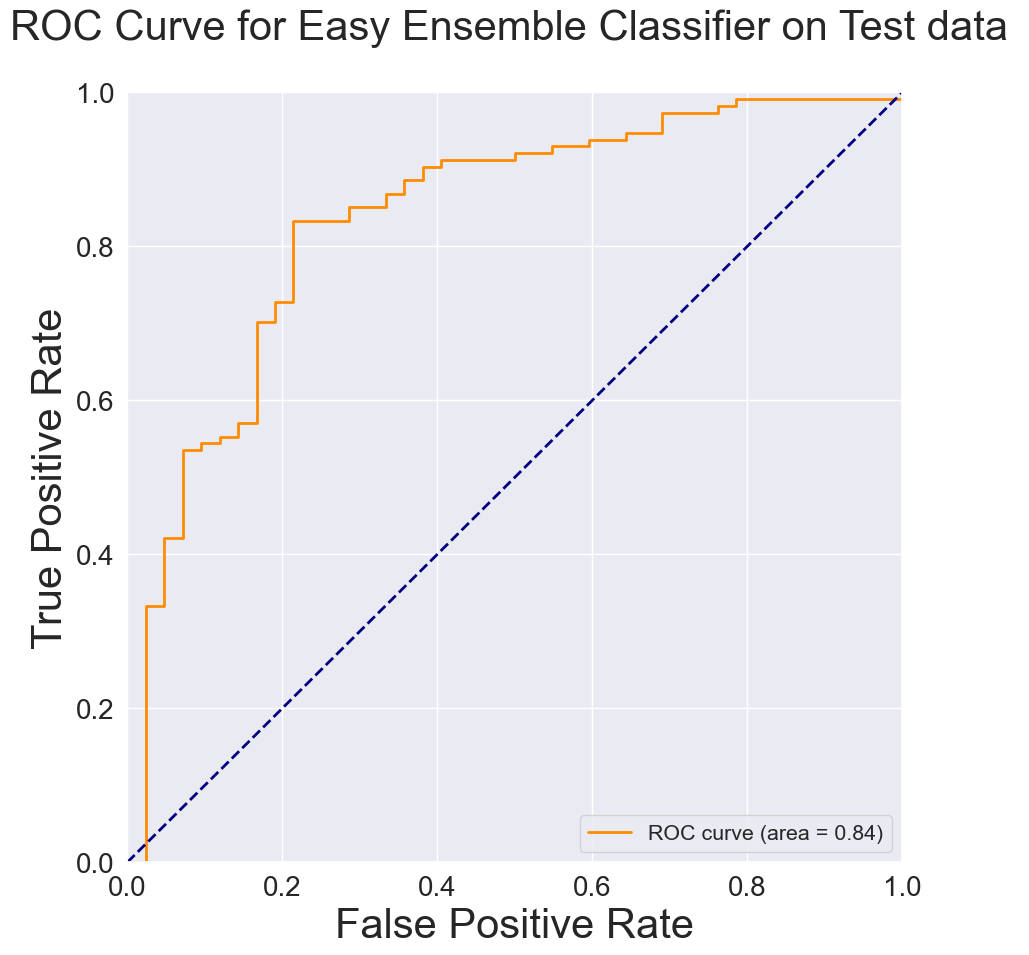

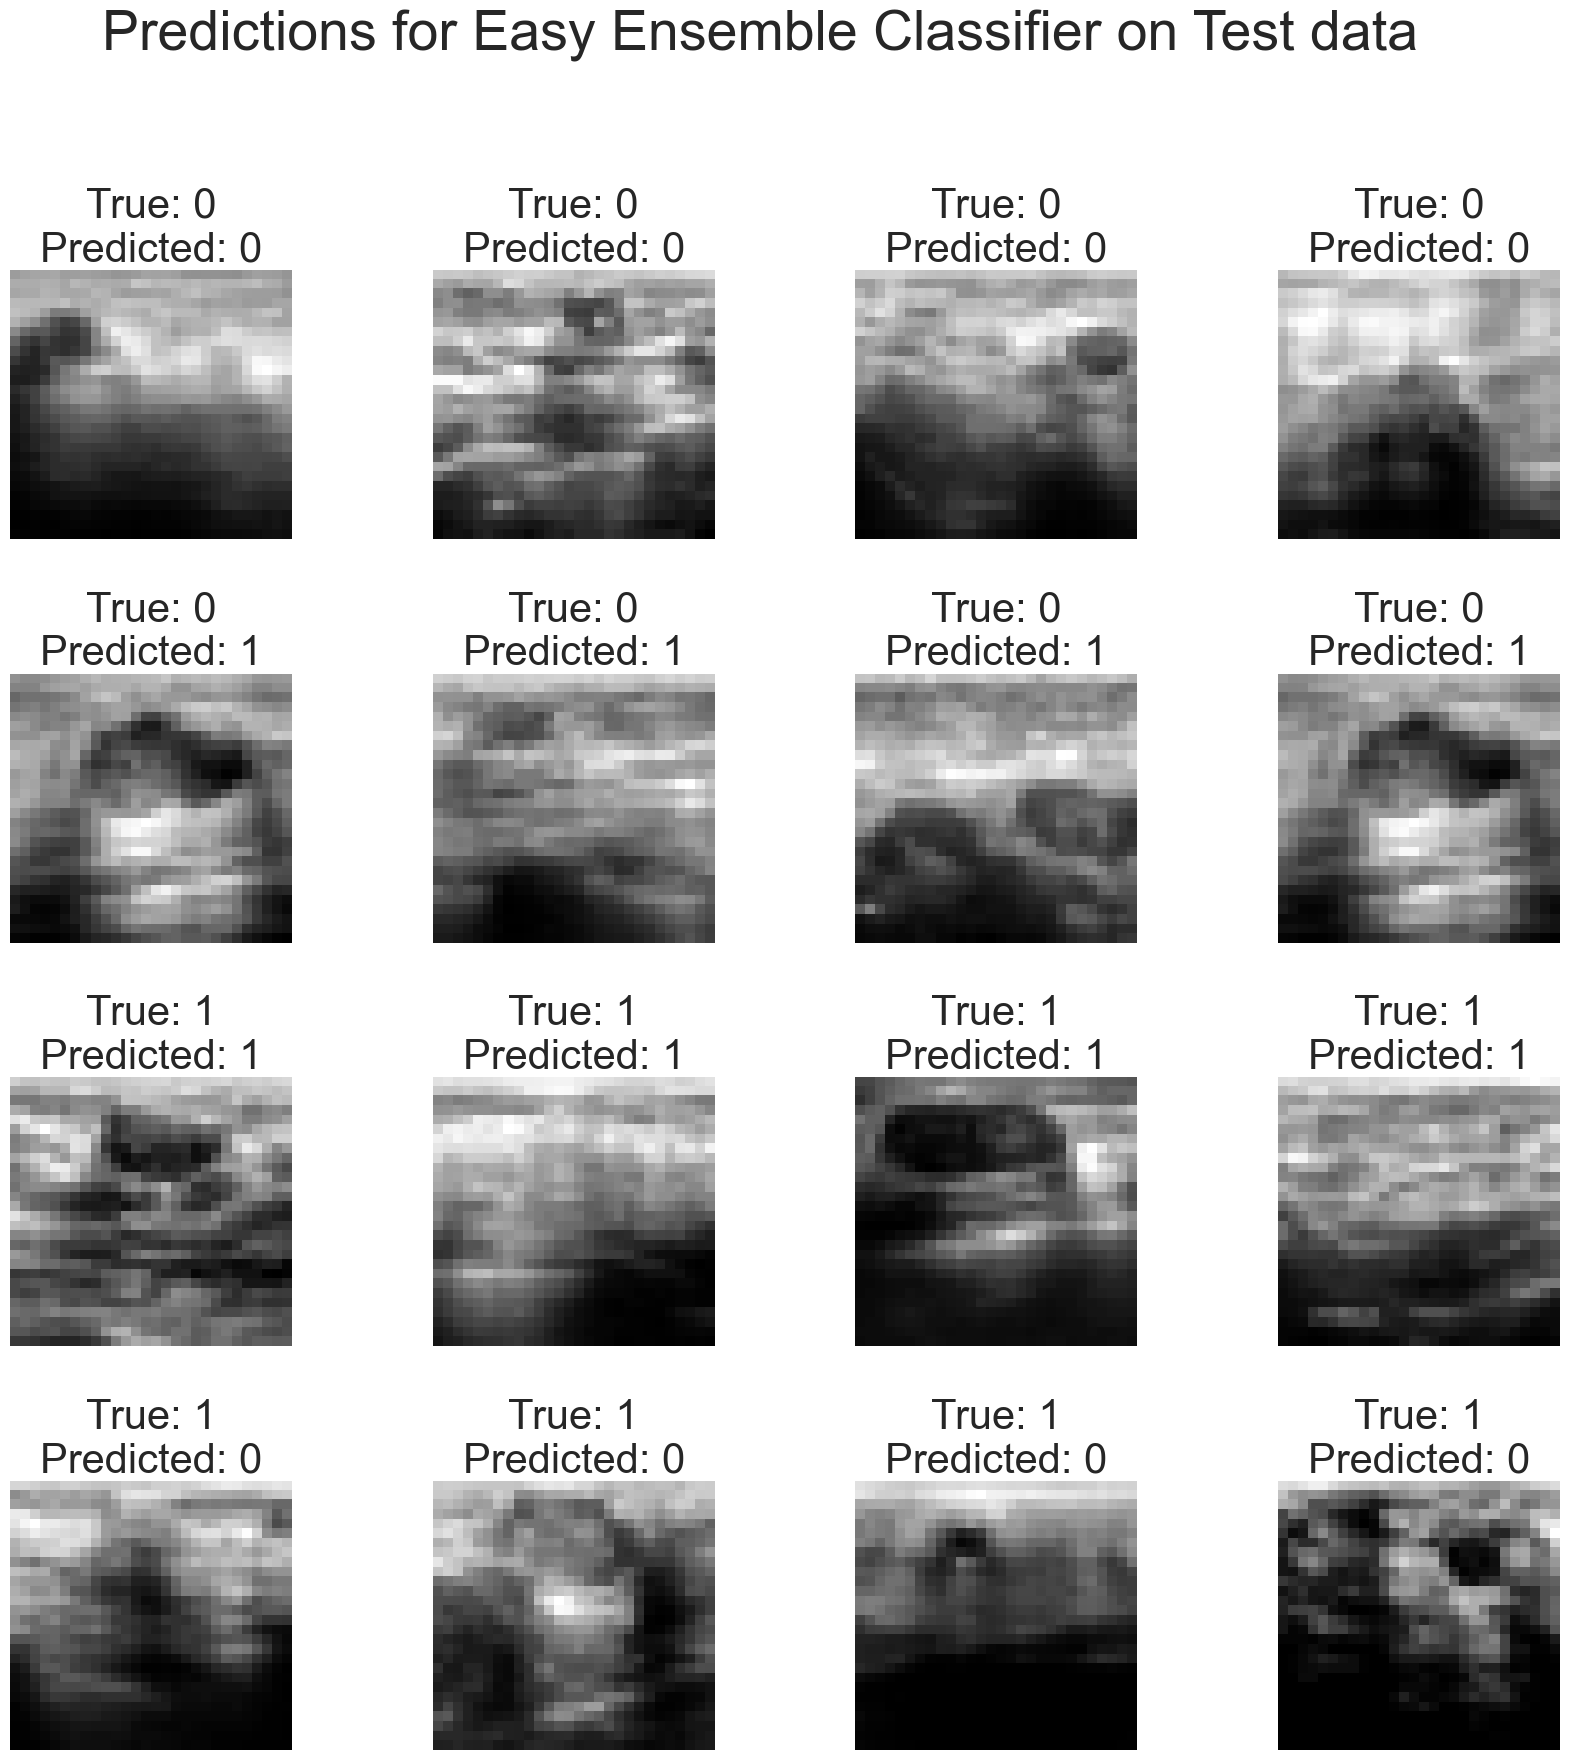

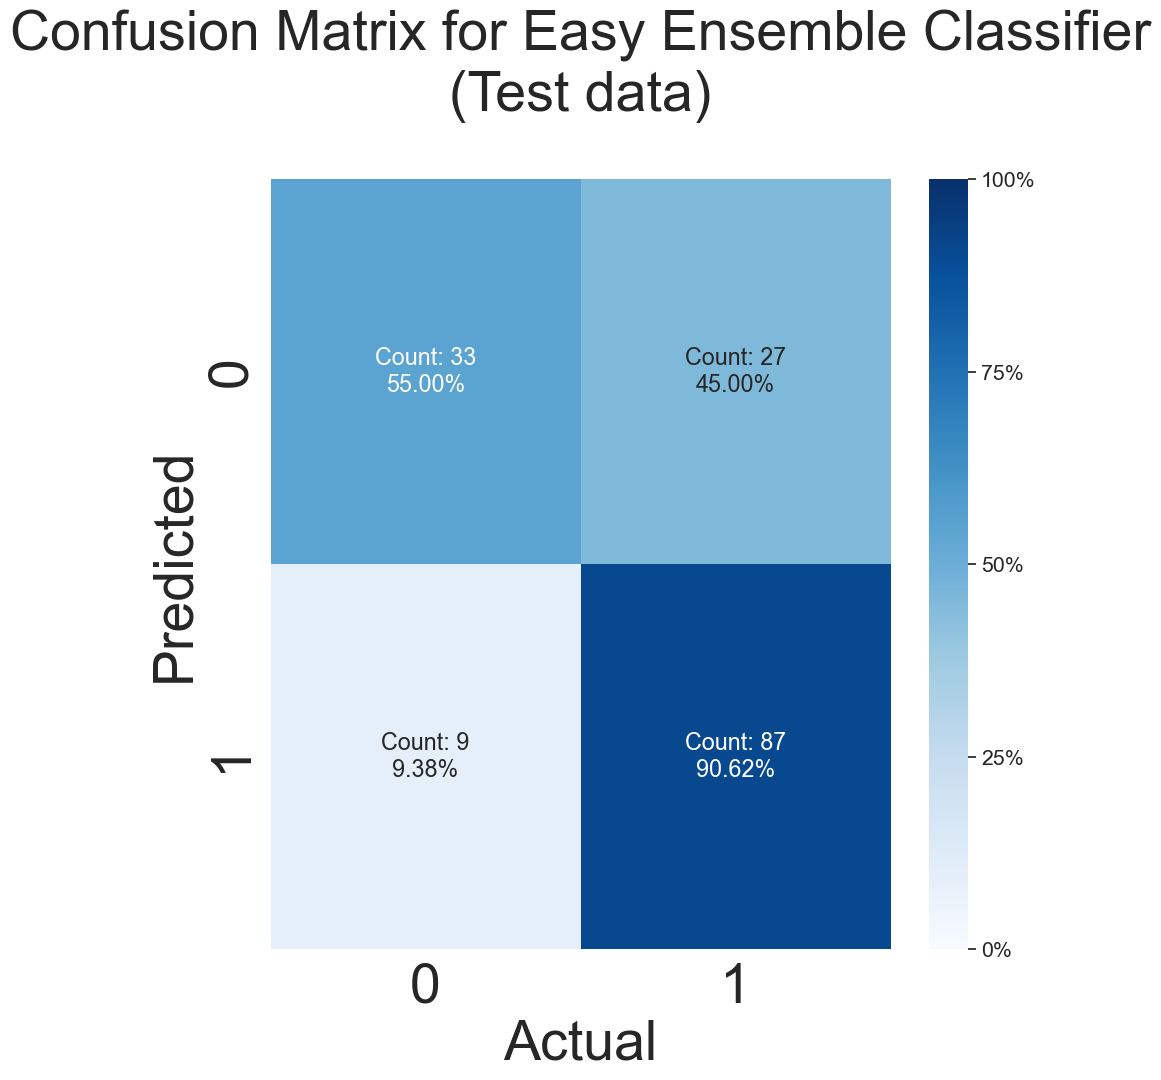

In [20]:
# Adjust the EEC model with the best parameters
eec = EasyEnsembleClassifier(
    estimator=GBC_estimator, n_estimators=20)

eec.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])

# Evaluate the EEC model on the test set
eec_test_predictions = eec.predict(
    breastmnist_test_images.drop(columns='label'))

eec_test_probabilities = eec.predict_proba(
    breastmnist_test_images.drop(columns='label'))

plot_roc_curve(breastmnist_test_images['label'],
               eec_test_probabilities[:, 1], 'Easy Ensemble Classifier', 'Test')

display_incorrect_images(breastmnist_test_images.drop(columns='label'),
                         breastmnist_test_images['label'], eec_test_predictions, 'Easy Ensemble Classifier', 'Test')

model_evaluation(breastmnist_test_images['label'],
                 eec_test_predictions, 'Easy Ensemble Classifier', 'Test')


(78,)


'              precision    recall  f1-score   support\n\n           0       0.85      0.52      0.65        21\n           1       0.85      0.96      0.90        57\n\n    accuracy                           0.85        78\n   macro avg       0.85      0.74      0.77        78\nweighted avg       0.85      0.85      0.83        78\n'

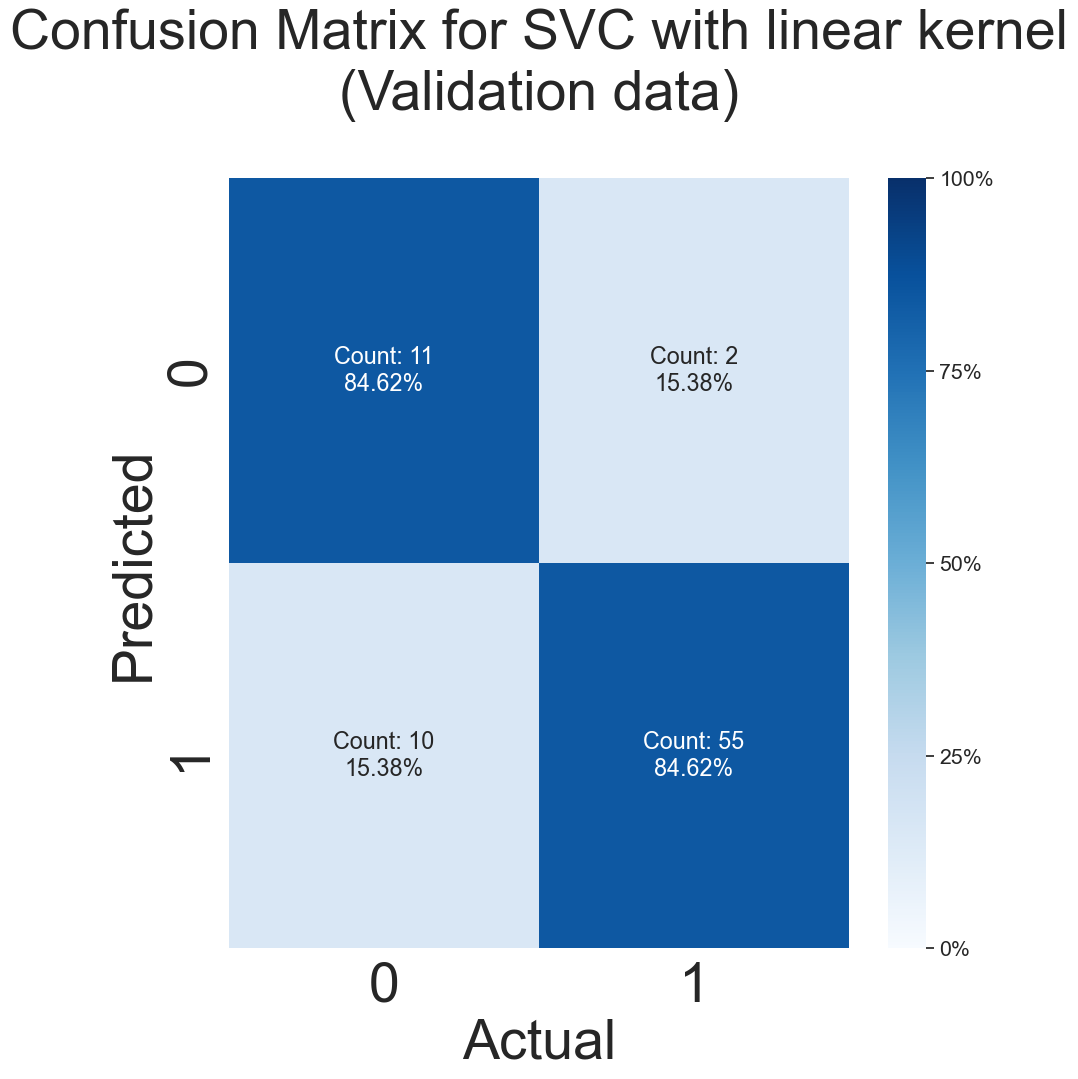

In [15]:
# Build a SVC model with a linear kernel on the breastmnist dataset
from sklearn.svm import SVC

print(breastmnist_val_images['label'].shape)

svc = SVC(kernel='linear')
svc.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
svc_predictions = svc.predict(breastmnist_val_images.drop(columns='label'))
model_evaluation(breastmnist_val_images['label'], svc_predictions, 'SVC with linear kernel', 'Validation')

{'linear': 0.8330984348342111, 'poly': 0.8330984348342111, 'rbf': 0.7931623931623931, 'sigmoid': 0.6108946697181991}


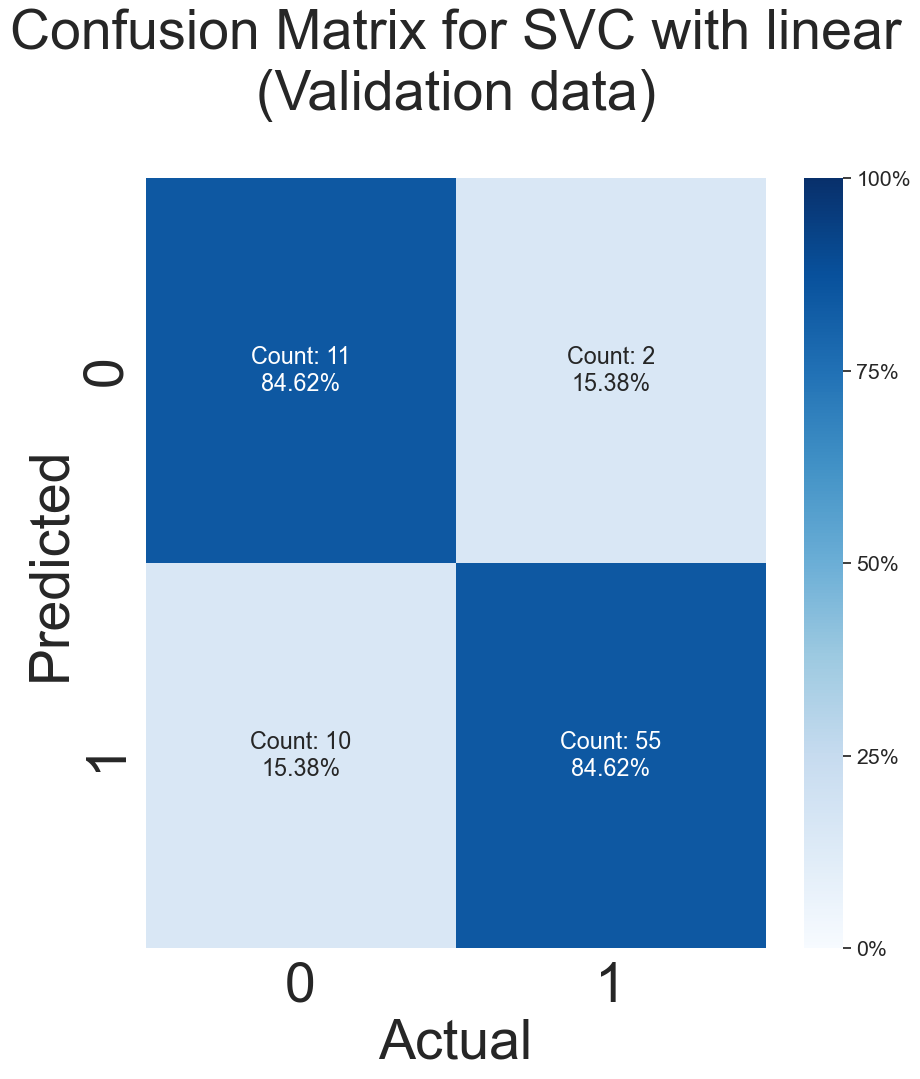

In [17]:
# Tune the SVC model by using different kernels
param_grid = ['linear', 'poly', 'rbf', 'sigmoid']
f1_score = {}
svc_pred_dict = {}

for k in param_grid:
    svc_tune = SVC(kernel=k)
    svc_tune.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
    svc_pred_dict[k] = svc_tune.predict(breastmnist_val_images.drop(columns='label'))
    f1_score[k] = classification_report(breastmnist_val_images['label'], svc_pred_dict[k], output_dict=True)['weighted avg']['f1-score']

best_kernel = max(f1_score, key=f1_score.get)
model_evaluation(breastmnist_val_images['label'], svc_pred_dict[best_kernel], f'SVC with {best_kernel}', 'Validation')


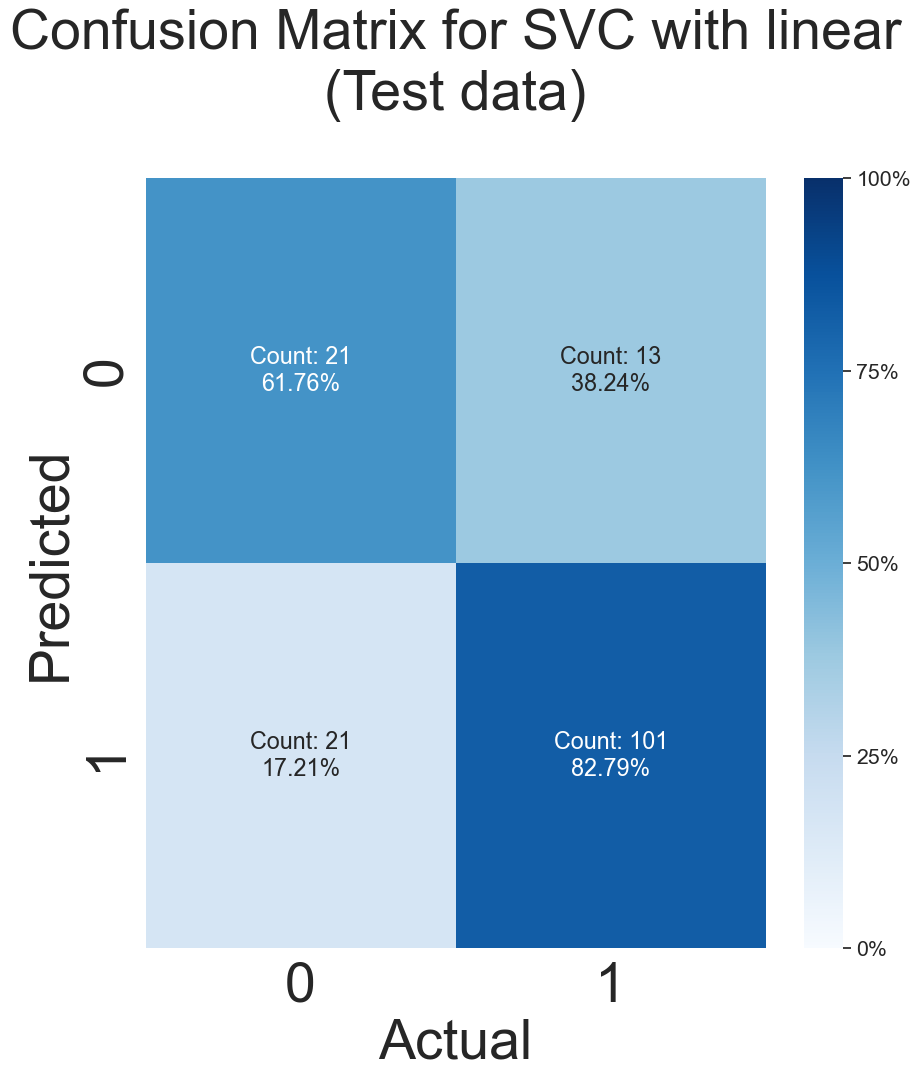

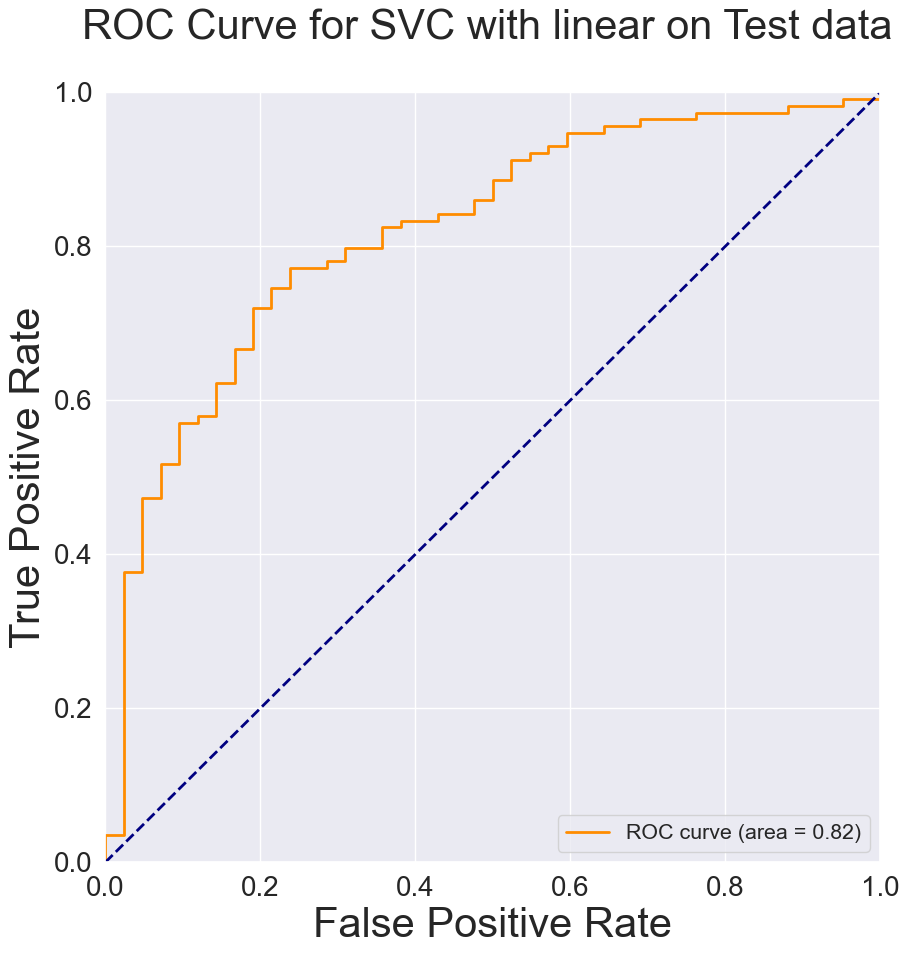

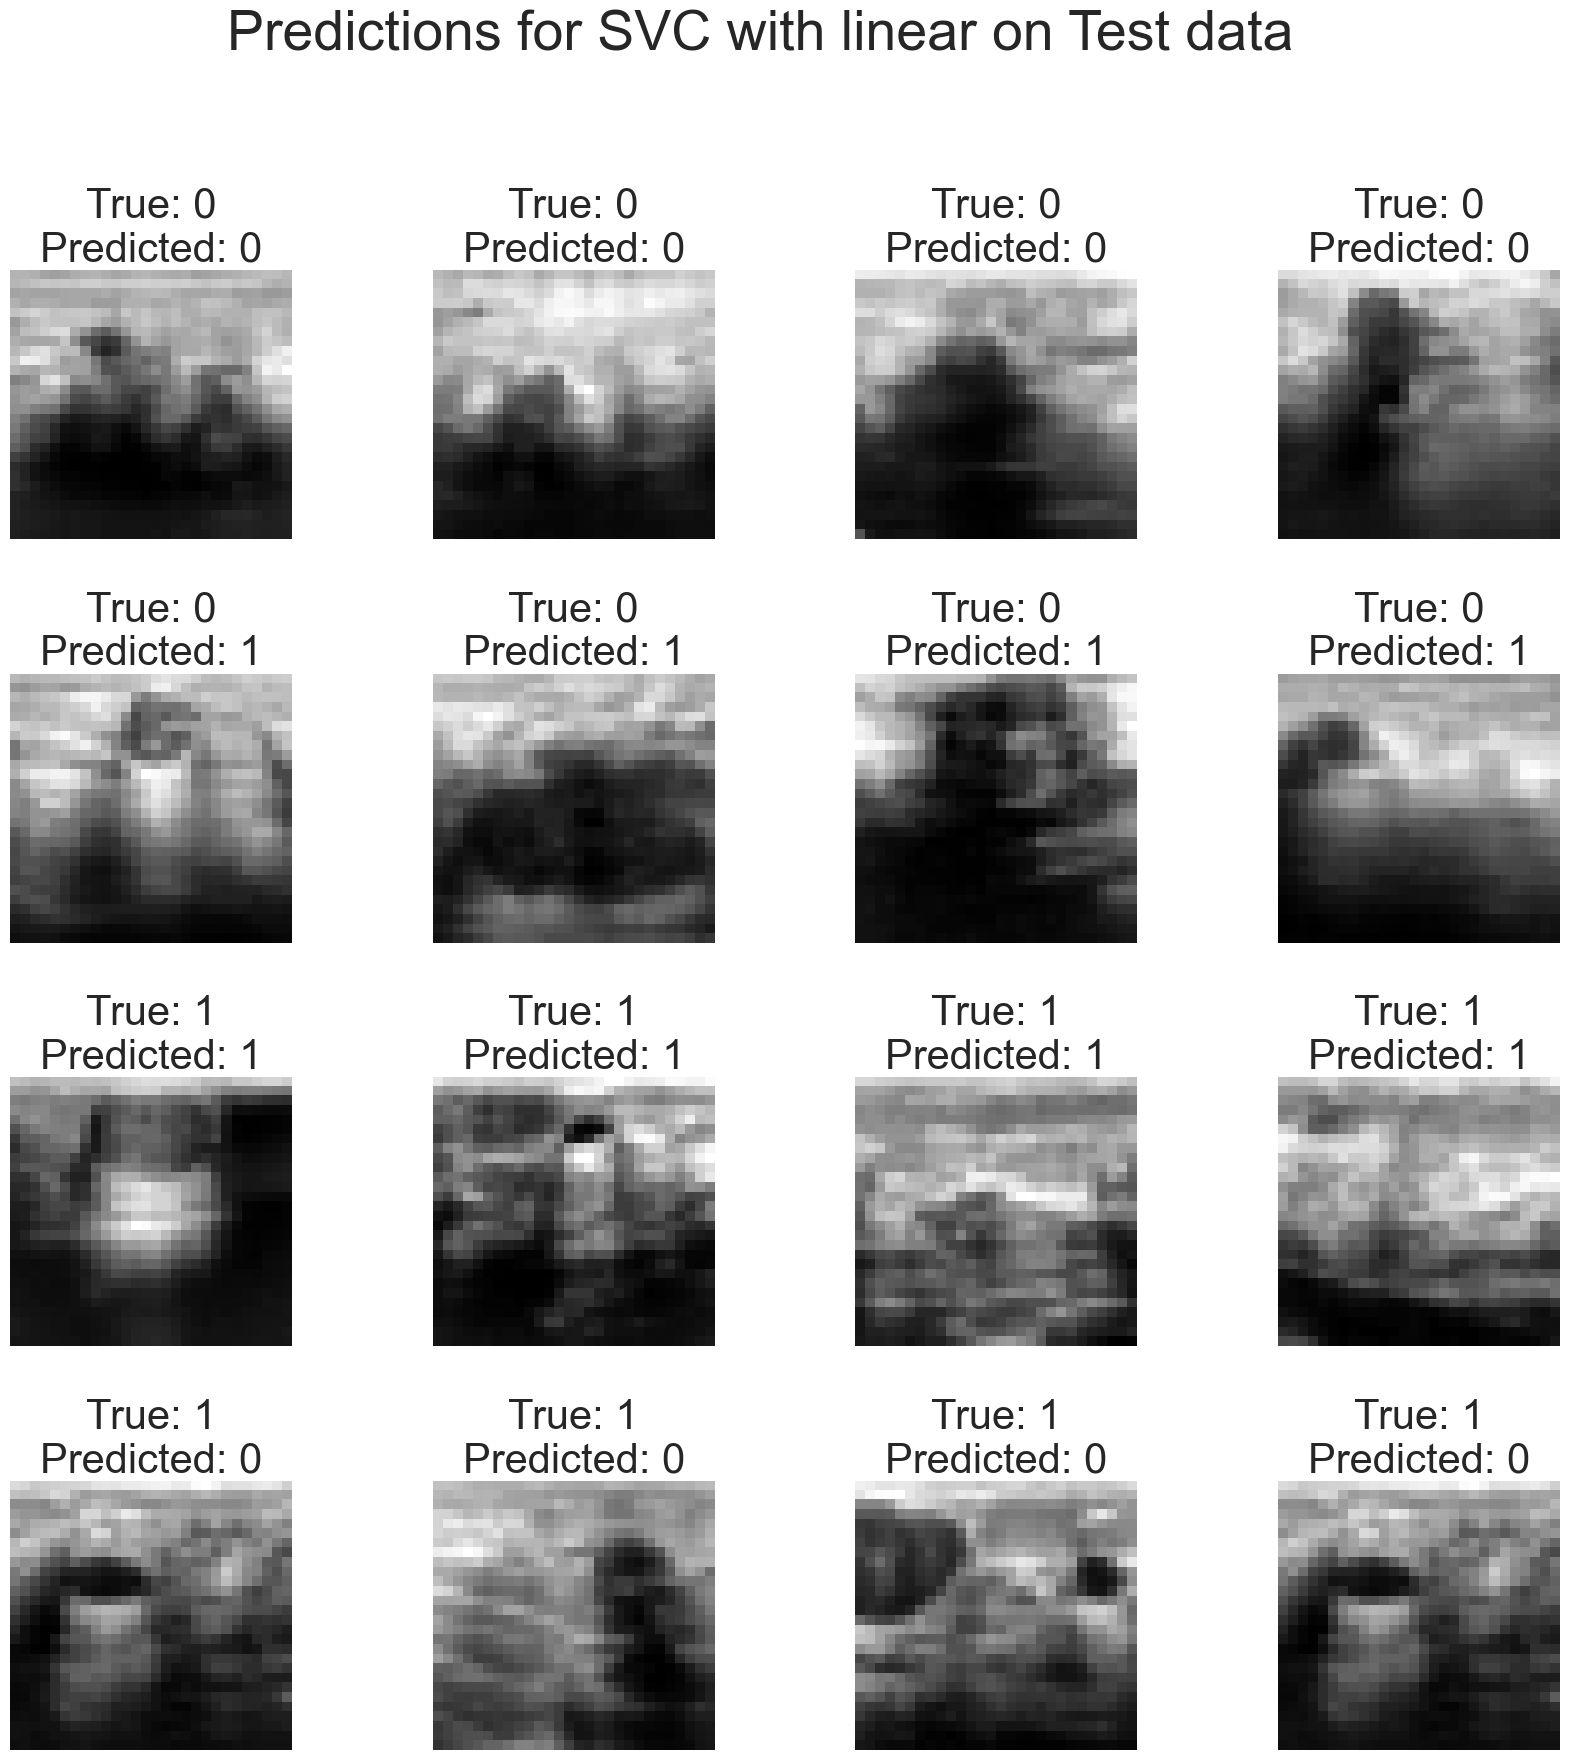

In [18]:
# Use the best kernel to evaluate the model on the test set
svc = SVC(kernel=best_kernel, probability=True)
svc.fit(breastmnist_train_images.drop(columns='label'), breastmnist_train_images['label'])
svc_test_predictions = svc.predict(breastmnist_test_images.drop(columns='label'))
model_evaluation(breastmnist_test_images['label'], svc_test_predictions, f'SVC with {best_kernel}', 'Test')


# Evaluate the probability of the model on the test set
svc_test_probabilities = svc.predict_proba(breastmnist_test_images.drop(columns='label'))

# Evaluate the RoC-AUC graph of the model on the test set
plot_roc_curve(breastmnist_test_images['label'], svc_test_probabilities[:, 1], f'SVC with {best_kernel}', 'Test')

# Display images that the model predicted incorrectly
display_incorrect_images(breastmnist_test_images.drop(columns='label'), breastmnist_test_images['label'], svc_test_predictions, f'SVC with {best_kernel}', 'Test')


(156, 785)
(156, 2)
(156, 785)
(156, 5)
(156, 785)
(156, 10)
(156, 785)
(156, 20)
(156, 785)
(156, 50)
Classification report for Gradient Boosting Classifier with PCA (n=20) on Validation data:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78        21
           1       0.89      0.98      0.93        57

    accuracy                           0.90        78
   macro avg       0.91      0.82      0.86        78
weighted avg       0.90      0.90      0.89        78



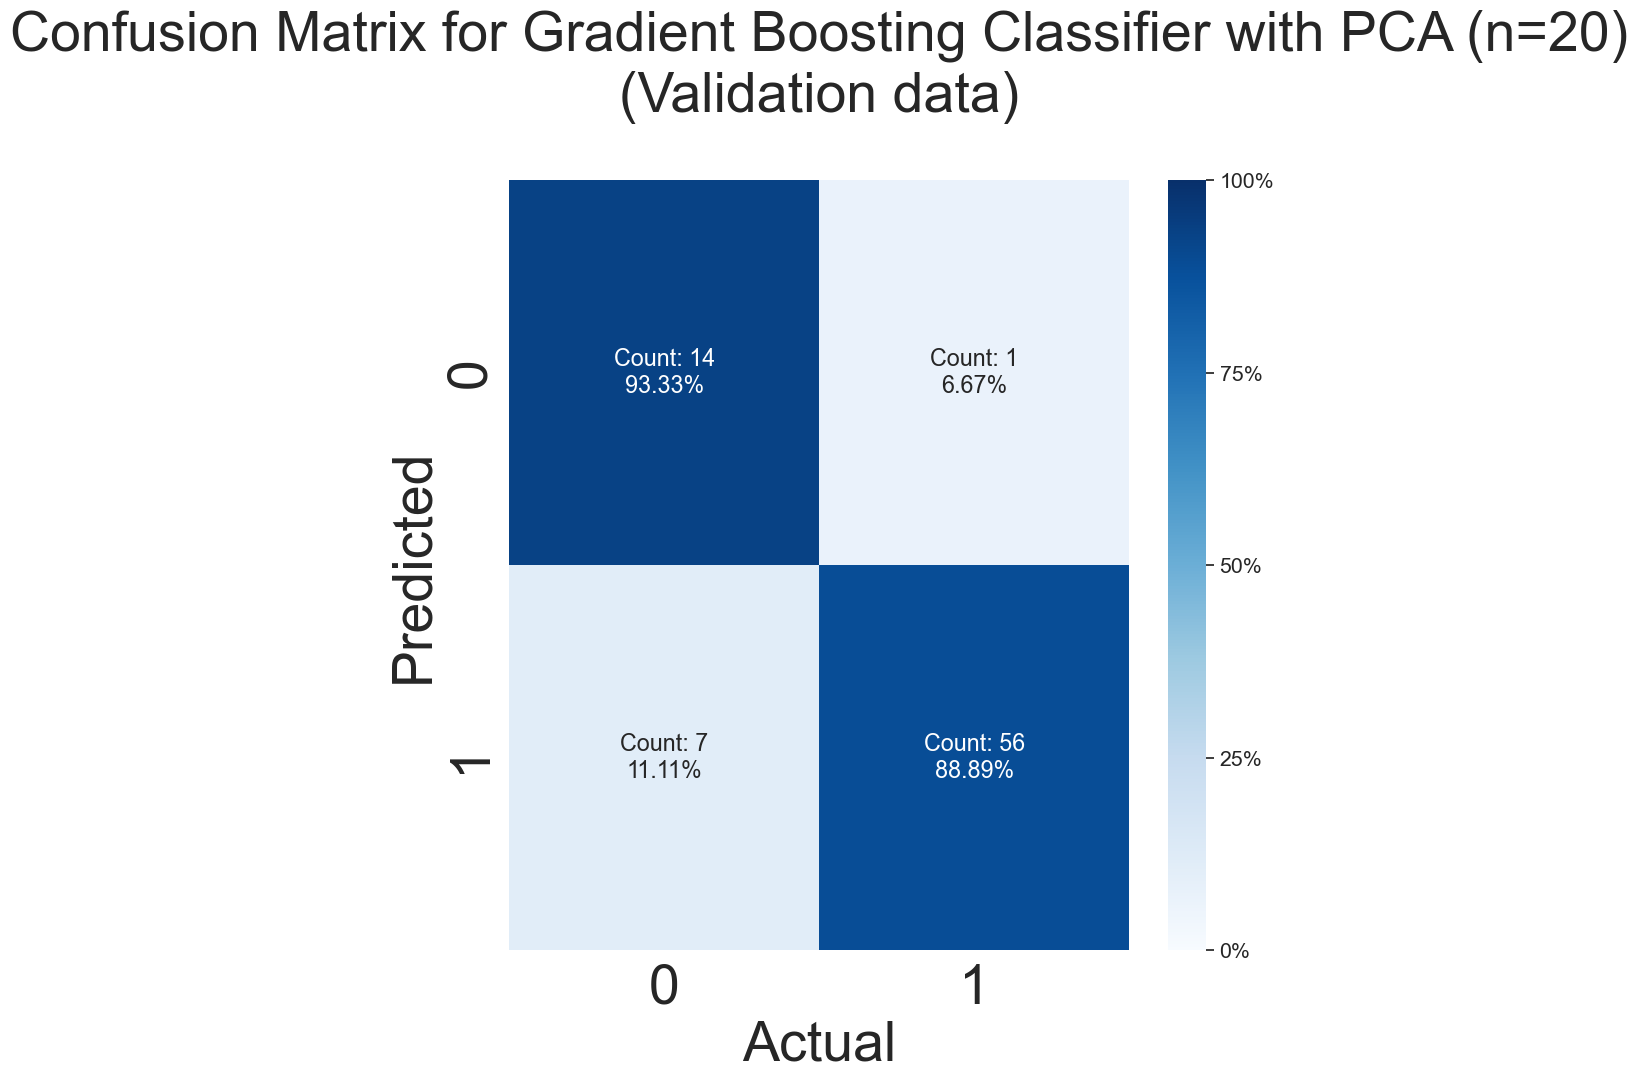

In [ ]:

# Test PCA on the breastmnist dataset for the Gradient Boosting Classifier model
n_of_components = [5, 10, 20, 50, 100]
f1_score_PCA = {}
gbc_pred_dict_PCA = {}

for n in n_of_components:
    pca = PCA(n_components=n)
    breastmnist_train_images_pca = pca.fit_transform(breastmnist_train_images.drop(columns='label'))
    breastmnist_val_images_pca = pca.transform(breastmnist_val_images.drop(columns='label'))
    breastmnist_test_images_pca = pca.transform(breastmnist_test_images.drop(columns='label'))

    gbc_PCA = GradientBoostingClassifier(n_estimators=100, max_depth=3)
    gbc_PCA.fit(breastmnist_train_images_pca, breastmnist_train_images['label'])
    gbc_PCA_predictions = gbc_PCA.predict(breastmnist_val_images_pca)
    gbc_pred_dict_PCA[n] = gbc_PCA_predictions
    f1_score_PCA[n] = classification_report(breastmnist_val_images['label'], gbc_PCA_predictions, output_dict=True)['weighted avg']['f1-score']

best_n = max(f1_score_PCA, key=f1_score_PCA.get)
model_evaluation(breastmnist_val_images['label'], gbc_pred_dict_PCA[best_n], f'Gradient Boosting Classifier with PCA (n={best_n})', 'Validation')

    


'              precision    recall  f1-score   support\n\n           0       0.65      0.36      0.46        42\n           1       0.80      0.93      0.86       114\n\n    accuracy                           0.78       156\n   macro avg       0.72      0.64      0.66       156\nweighted avg       0.76      0.78      0.75       156\n'

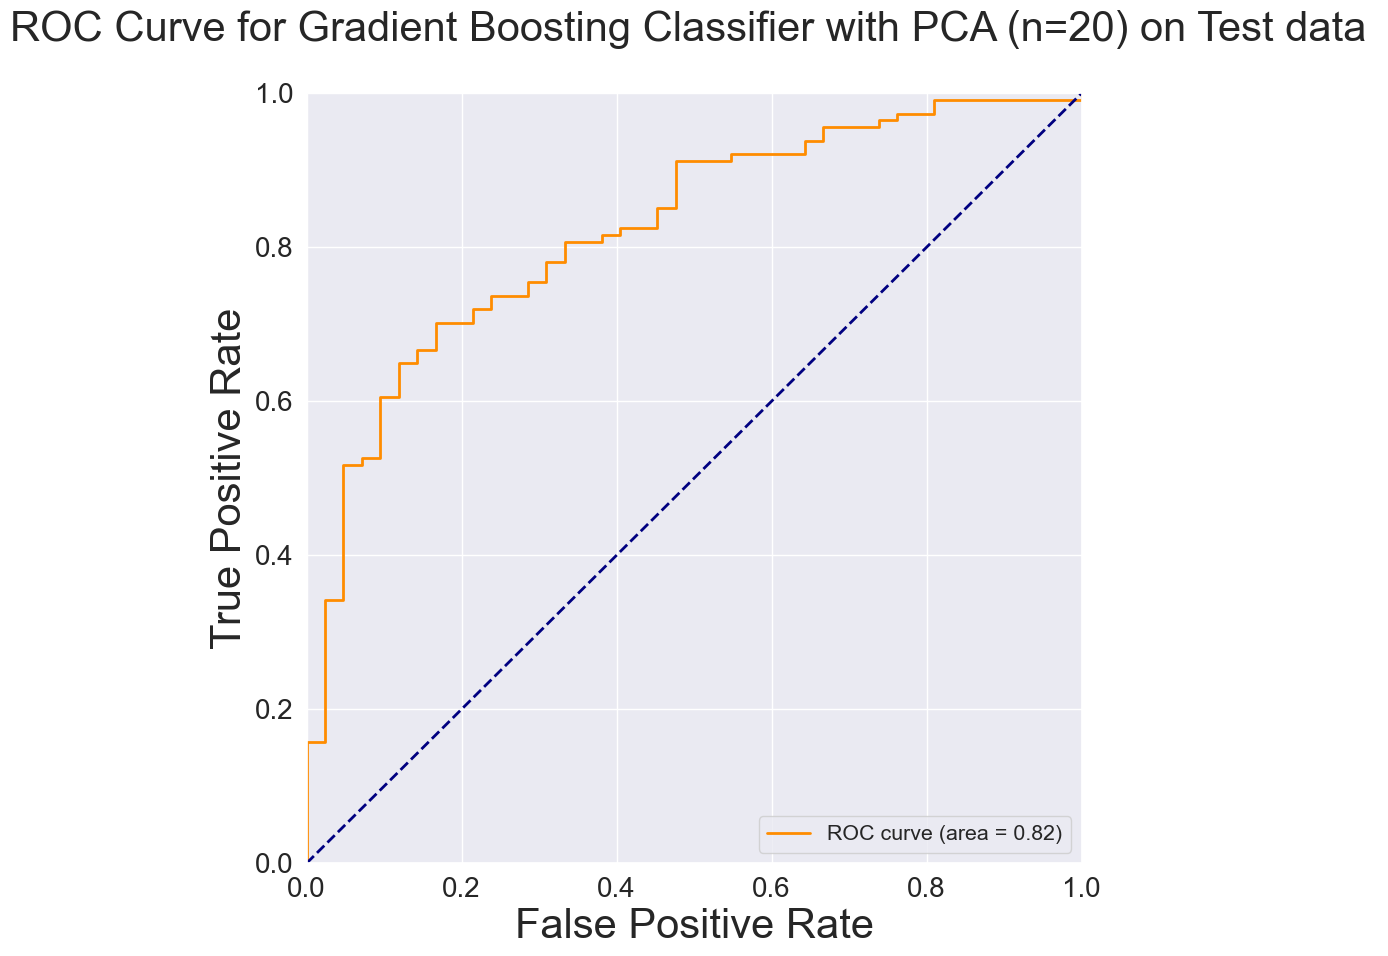

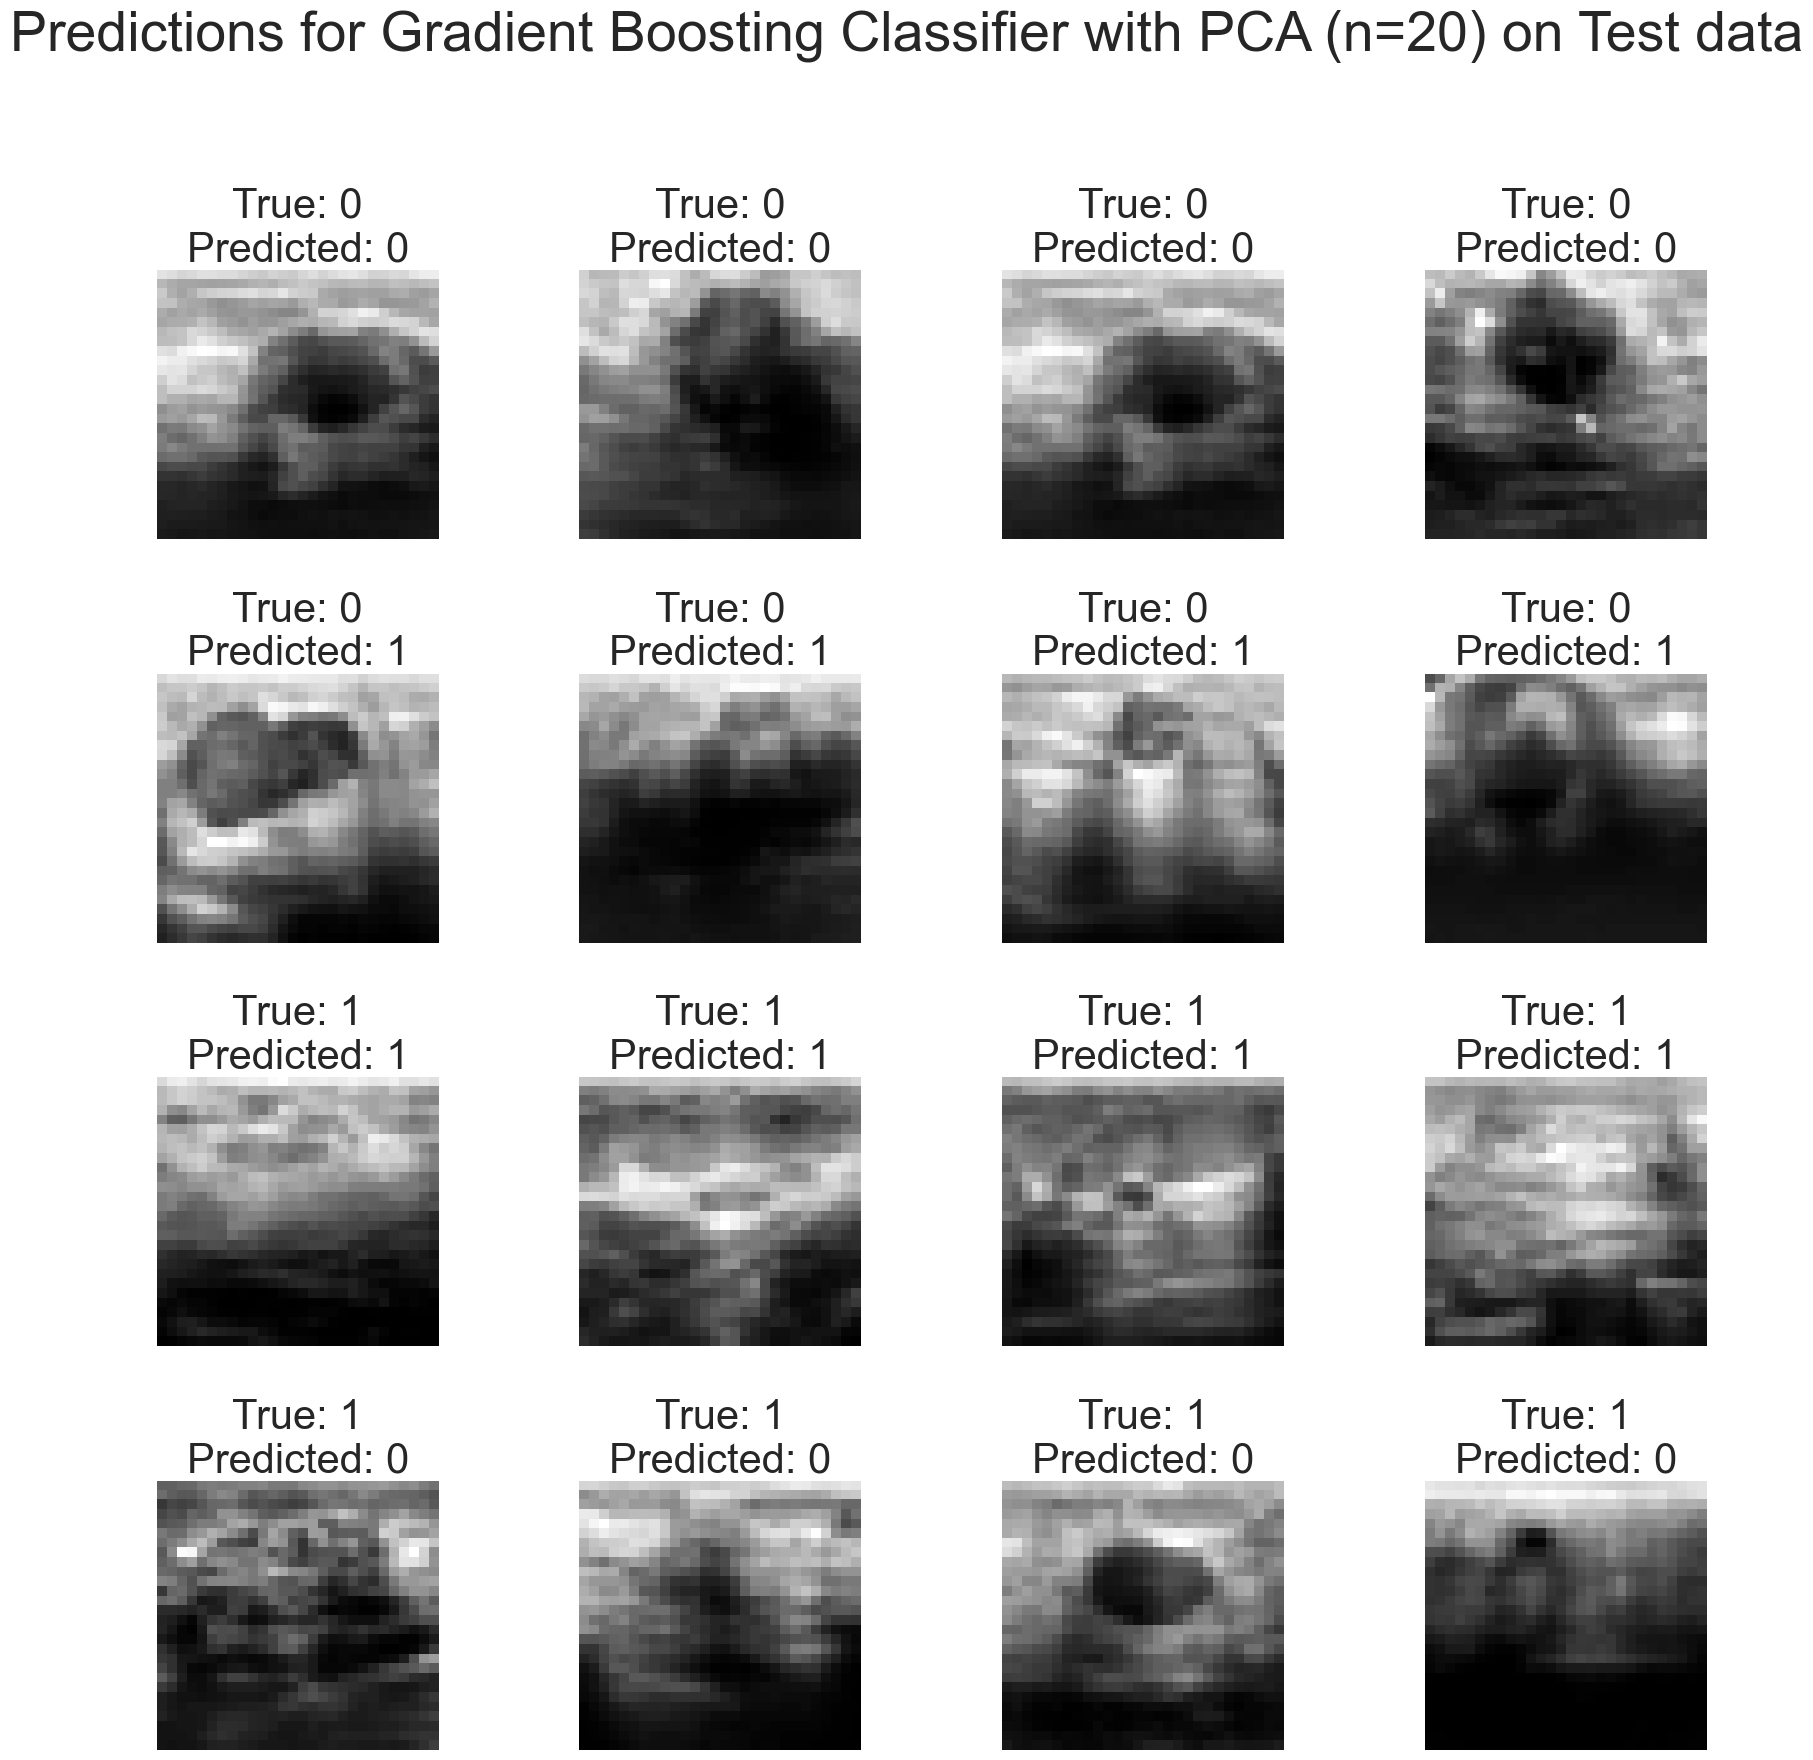

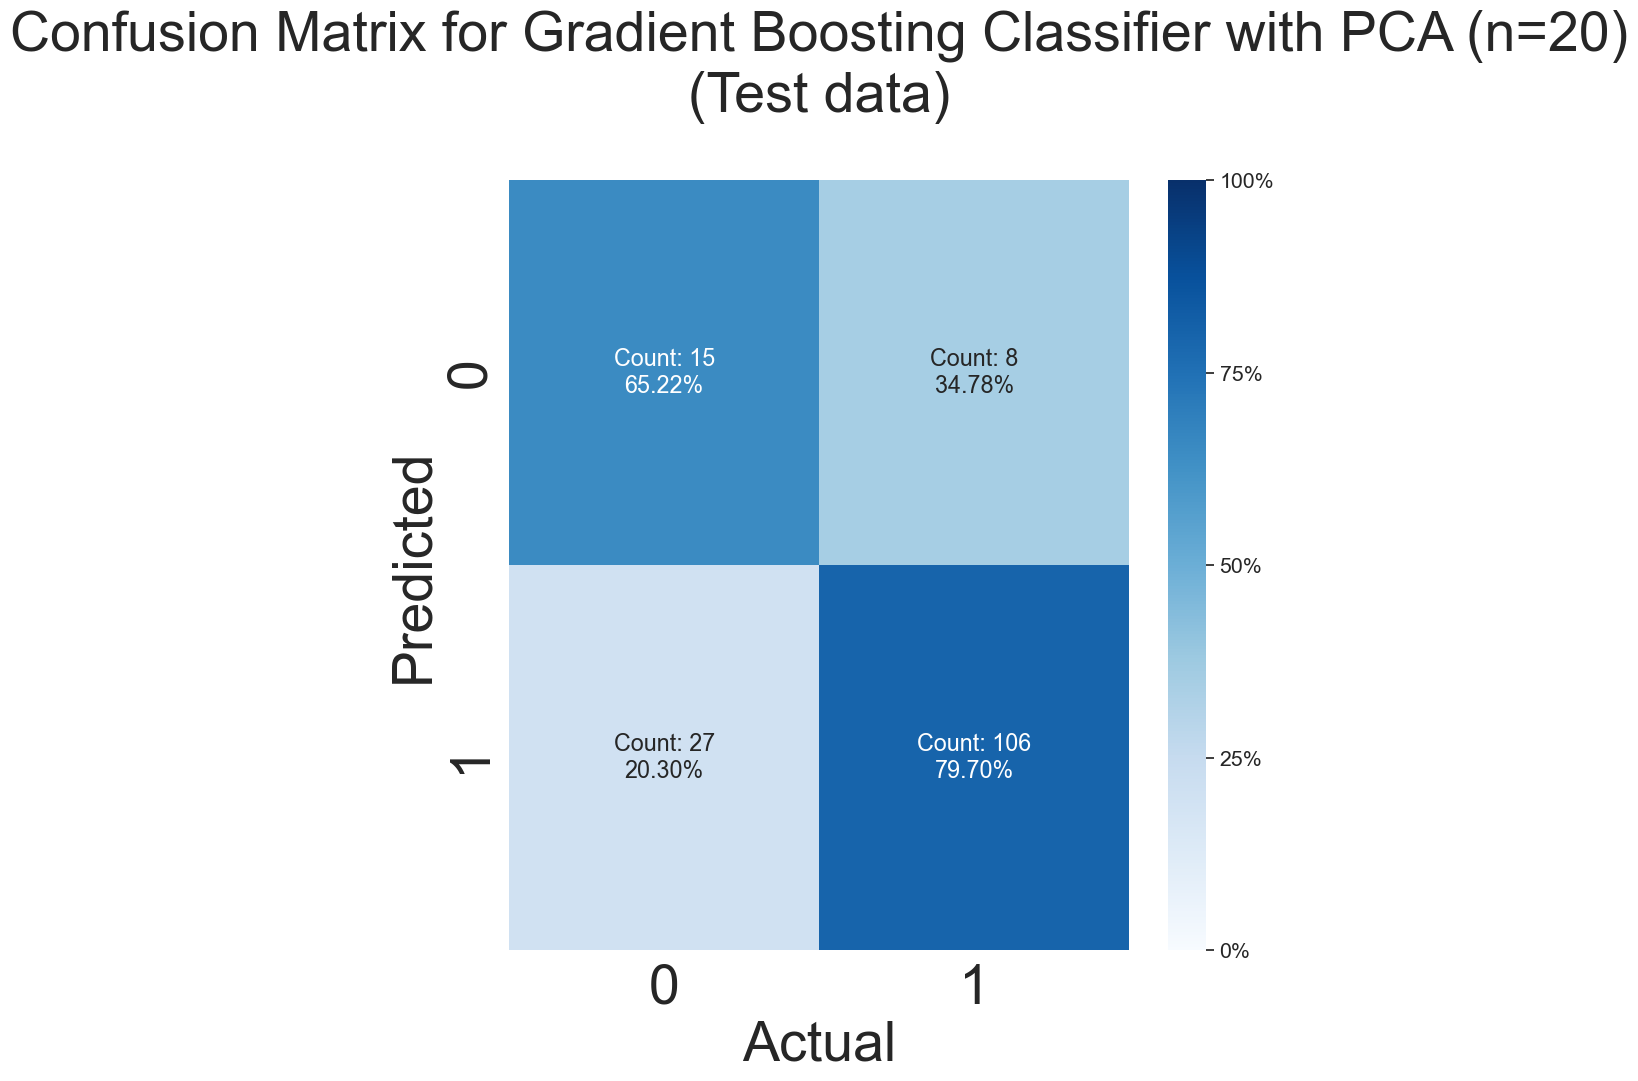

In [19]:
best_n = 20
# Evaluate the best PCA model on the test set
pca = PCA(n_components=best_n)
breastmnist_train_images_pca = pca.fit_transform(
    breastmnist_train_images.drop(columns='label'))
breastmnist_test_images_pca = pca.transform(
    breastmnist_test_images.drop(columns='label'))

gbc_PCA = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gbc_PCA.fit(breastmnist_train_images_pca, breastmnist_train_images['label'])
gbc_PCA_predictions = gbc_PCA.predict(breastmnist_test_images_pca)

gbc_PCA_probabilities = gbc_PCA.predict_proba(breastmnist_test_images_pca)

plot_roc_curve(breastmnist_test_images['label'], gbc_PCA_probabilities[:, 1],
                f'Gradient Boosting Classifier with PCA (n={best_n})', 'Test')

display_incorrect_images(breastmnist_test_images.drop(columns='label'), breastmnist_test_images['label'], gbc_PCA_predictions, f'Gradient Boosting Classifier with PCA (n={best_n})', 'Test')

model_evaluation(breastmnist_test_images['label'], gbc_PCA_predictions,
                 f'Gradient Boosting Classifier with PCA (n={best_n})', 'Test')
